# **The Foundation of Applied Machine Learning**
## Spring 2019

### Instructor: [**Prof. Bahram Mobasher**](http://faculty.ucr.edu/~mobasher/)
### Teaching Assistance: [**Abtin Shahidi**](https://abtinshahidi.github.io/) email *abtin.shahidi--at--email.ucr.edu*

### Course webpage: [https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning](https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning)



# **Week 6**

## Machine Learning: Regression 

"Heaviliy based on _Artificial Intelligence: A Modern Approach_" Chap. 18 


We have already worked with the idea of regression when we were fitting line through our data set. But first let's talk about **supervised learning** algorithms in general. 


## Supervised learning:


These are the concepts to know:

### Training set:

Imagine that you have $N$ example such as $(\vec{x}_1, y_1)$, $(\vec{x}_2, y_2)$, ... $(\vec{x}_N, y_N)$. In which $\vec{x}$ is the vector of features, and $y$ is the output of that given $\vec{x}$.

We assume that there is an underlying function that give the values for each $y_i$, so basically $y = f(\vec{x})$. The task is to find the a function $g$ that is best representation of the unknown $f$.


Notice that we did not talk about $\vec{x} \in \mathbb{R}^n $. They can get any value and not restricted to numbers.


### Hypothesis:

Our approximation function $g$ is called hypothesis. And our task is to find the best hypothesis in the space of all the possible hypotheses or **hypothesis space** ($\mathbb{H}$). As you can see we are not looking to find $f$, so there are more than one hypothesis that can fall into our confidence interval.



### Test set:

The way we can make sure that we are on the right track and to monitor our hypothesis performance we separate the original data set into trainging and test sets in a random manner. Basically, we make sure that we have two disctint sets of examples.


So we are trying to learn from the training data to come up with the "best" hypothesis. We do not required $f$ to be deterministic. So we can even learn from the stochastic function by coming up with the $p(y|\vec{x})$.


When we have a finite set of values for $y$ the call the learning problem **classification** and it is also known as Boolean or binary classification when we have only **two** possible oucomes. 


But when we are dealing with a real-valued numbers we call the learning problem **regression**. And we are not trying to find the "real" value of $y$, we are only interested in a conditional excpectation of $y$ or $p(y|\vec{x})$.

We have already saw an example for both, fitting curve for regresson and K-neareset neighbours for classification. 

Now let's go back to our regression problem: 

$$
\begin{equation*}
y_j = f(\vec{X_j})
\end{equation*}
$$

And let's assume that we have a $n$ dimensional array of inputs for each example. (Array of features $X_j$) And each feature vector has a corresponding weight $\vec{w} = (w_1, w_2, ..., w_n)$

$$
\begin{equation*}
g(\vec{x}_j) = w_0 + \sum_{i=1}^n w_i X_{j, i}
\end{equation*}
$$

For convenience we can add a dummy feature $x_{j,0} = 1$.and  So we can write:

$$
\begin{equation*}
g(\vec{X}_j) = \sum_{i=0}^n w_i X_{j, i} = \vec{w} . \vec{X}_j = X \vec{w} 
\end{equation*}
$$

We can find the value for $\vec{w^*}$ by solving the matrix equation analytically.


$$
\begin{equation*}
X \vec{w} = \vec{y}
\\
X^\intercal (X \vec{w}) = X^\intercal (\vec{y})
\\
(X^\intercal X)^{-1} (X^\intercal X) \vec{w} = (X^\intercal X)^{-1} X^\intercal \vec{y}
\end{equation*}
$$

Which finally leads to:

$$
\begin{equation*}
\vec{w} = (X^\intercal X)^{-1} X^\intercal \vec{y}
\end{equation*}
$$



The vector $\vec{w}^*$ can be found to be the best answer, by minimizing the squared-error loss on all of the examples: 


$$
\begin{equation*}
\vec{w}^* = argmin_w \sum_j L_2(y_j, \vec{w}.\vec{X_j})
\end{equation*}
$$




In which $X$ is the matrix of the data. Let's look at an example:

Let's start with importing libraries:

In [3]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure) 

Making some random data points:

In [4]:
X = 3.2 * np.random.rand(100, 1)
y = 1.5 + 1.9 * X + np.random.randn(100, 1)

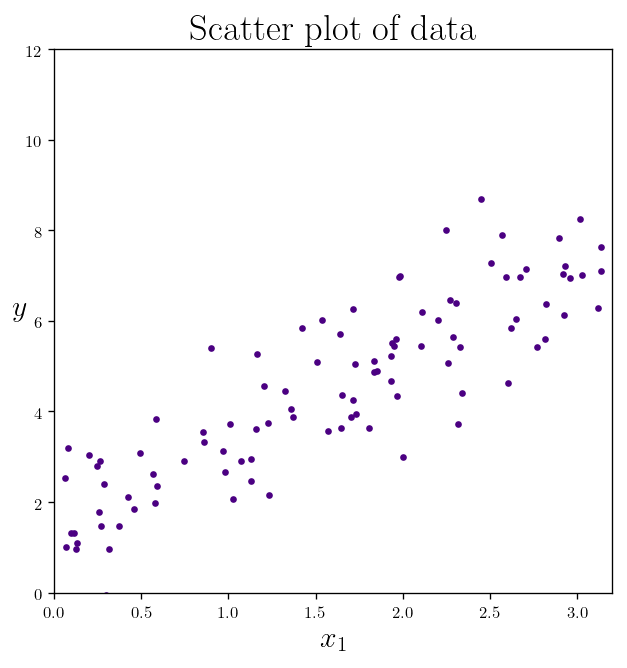

In [5]:
plt.plot(X, y, ".", color="indigo")


plt.title(r"Scatter plot of data")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.axis([0, 3.2, 0, 12])


plt.show()

Adding the dummy feature $x_{j,0} = 1$:

In [6]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

Finding the weights:

According to our previously found solution:
$$
\begin{equation*}
w = (X^\intercal X)^{-1} X^\intercal y
\end{equation*}
$$


In [7]:
inv = np.linalg.inv

weight_best = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

This is the weights we found:

In [8]:
weight_best

array([[1.50826931],
       [1.88415094]])

Now that we have the best weights, we can make a prediction about the following $X_{new}$: 

In [9]:
X_new = np.array([[0], [3.2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

And this is the prediction vector we got:

In [10]:
y_predict = X_new_b.dot(weight_best)
y_predict

array([[1.50826931],
       [7.5375523 ]])

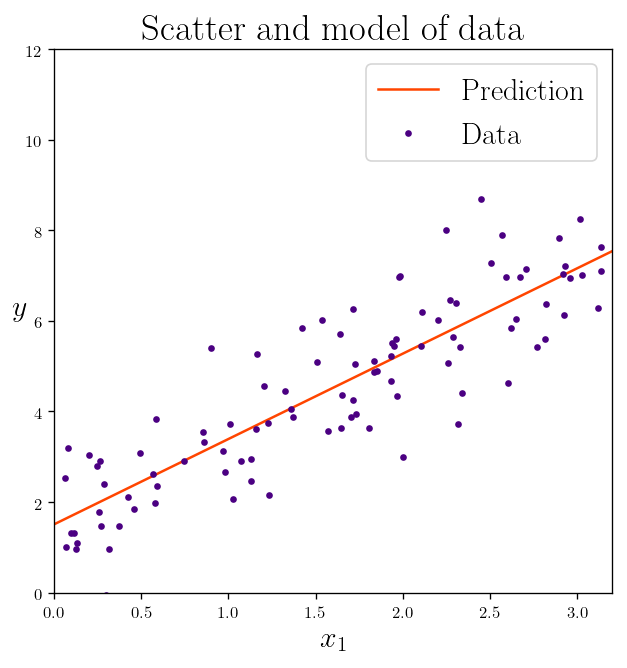

In [11]:
plt.plot(X_new, y_predict, "-", color="orangered", label="Prediction")
plt.plot(X, y, ".", color="indigo", label="Data")


plt.title(r"Scatter and model of data")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$", rotation=0,)

plt.legend(fontsize = 18)
plt.axis([0, 3.2, 0, 12])


plt.show()

Now let's use the [skit-learn](https://scikit-learn.org/stable/) library to do the same thing:

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

After difining our `lin_reg` model, let's fit the data:

In [13]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print("The intercept of the linear model:",  lin_reg.intercept_)
print("The slope of the linear model:",  lin_reg.coef_)

The intercept of the linear model: [1.50826931]
The slope of the linear model: [[1.88415094]]


Let's plot the prediction and data again:

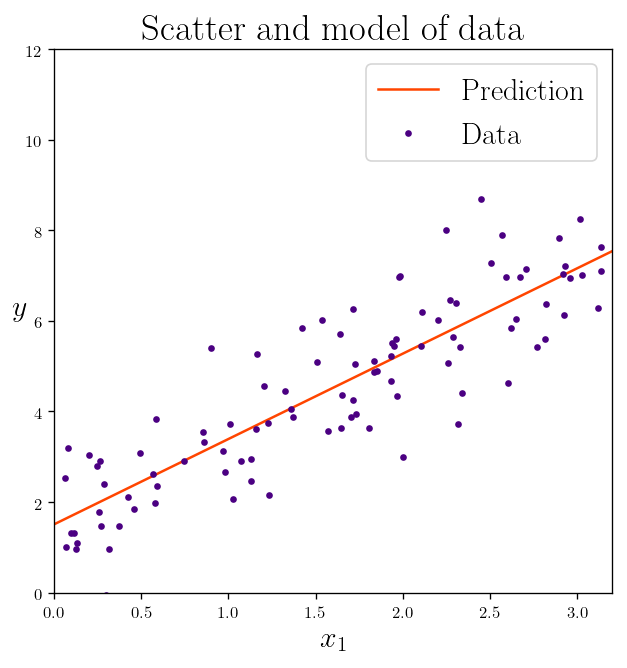

In [15]:
x_span = np.array([0, 3.2])
X_span = x_span.reshape((len(x_span), 1))


plt.plot(x_span, lin_reg.predict(X_span), "-", color="orangered", label="Prediction")
plt.plot(X, y, ".", color="indigo", label="Data")

plt.title(r"Scatter and model of data")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$", rotation=0,)

plt.legend(fontsize = 18)
plt.axis([0, 3.2, 0, 12])


plt.show()

## Computational complexity:

### Number of features:

Analytical solution computation time depends on the required time for inversing a matrix which is 
between $O(n^{2.373})$ for optimized **Coppersmith–Winograd** like algorithms and $O(n^3)$ for usual **Gauss-Jordan** elimination when $n$ is the number of features. 


So you can see that doubling the number of features will require 5 to 8 times more computation time, which means when are dealing with large number of features we should think about better ways of finding the model.


### Number of examples in training set:

One of the strongest features of the anayltical solution is that the computational time scales linearly which means $O(n)$ which is very reasonable for large datasets. (As long as you can fit your data into your memory)


source: https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations

For cases that the straightforward method is not suitable we can use optimization. One the most general optimization for finding the optimal solution is **Gradient Descent (GD)**.

# Gradient Descent:


The basic idea is to tweak the parameters until you reach to the optimal solution. So the idea is to make best decision locally. So finding the gradient at each point starting from some **random initialization** and moving along the direction of the gradient (or oppose for finding minimum) till we reach to the optimal point with zero gradient. Imagine your hiking on the mountain an trying to get to the peak in the most. You can make the decision to move along the path that makes the maximum change in height. (Not a wise decision when you are actually hiking!) That's how can we reach to the top in minimal fashion.

In [16]:
_x_ = np.linspace(-10, 10)
_y_ = np.linspace(-10, 10)

X1, Y1 = np.meshgrid(_x_, _y_)

Z1 = X1**2 + Y1**2


_movements_X = np.array([-10, -7, -4, -2, -1, 0])
_movements_Y = np.array([-10, -7, -4, -2, -1, 0])

_movements_Z = _movements_X**2 + _movements_Y**2


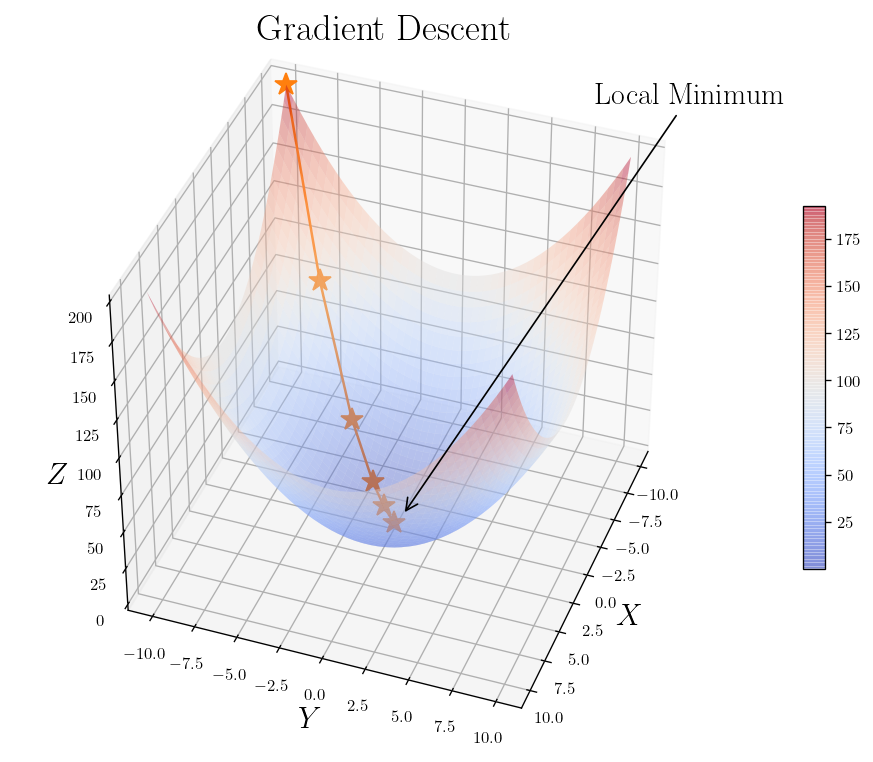

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')


# Plot the surface.
surf = ax.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True,
                       alpha = 0.4)

ax.plot(_movements_X, _movements_Y, _movements_Z, "*-", markersize= 14,)

plt.annotate("Local Minimum", xy=(0.0022, -0.035), xytext=(0.05,0.07), arrowprops={"arrowstyle" : "->"})

# ax.text(9, 0, 0, "red", color='red')


plt.title(r"Gradient Descent", y =1.05)

ax.view_init(40, 20)

ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$Z$")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=16)

plt.show()


One of the most important parameters in the GD is the **learning rate**. (learning rate hyperparameter) And one the important tasks is to select this wisely otherwise too small learning rate makes the algorthim too long to converge and if it is too large it can miss the optimal point.



The figure above is for the case that we have a **global** minimum and a **continuous** and **convex** function (line between any two points on the surface does not got through the surface) 


In this special case of linear regression we deal with a function that has all these features which make the GD to get arbitrary close to the global minimum within given learning rate reach. Another thing to remember is that we can have different time of convergence if the features have different scales. (unnormalized features) So a good practice is to scale the features first then apply GD algorithm.

# Linear regression with batch gradient descent:


The first thing we should do is to find the cost/loss function ($L$) and the gradient of the cost function with respect to it's parameters ($w_j$) so basically we need to find the following:

$$
\begin{equation*}
\frac{dL}{d\vec{w}}|_{X} = \vec{\nabla}_{w_i} L(X, \vec{w}) = \vec{\nabla}_{w_i} L_2(X, \vec{w})
\end{equation*}
$$

And in the case linear regression we have $L_2$ which is the squared error loss function, so we can let's find the gradient first and then define the steps for walking towards the optimal point on the surface.

$$
\begin{equation*}
\nabla_\vec{w} L_2(X, y, \vec{w})= (\frac{\partial L_2}{\partial w_1}, \frac{\partial L_2}{\partial w_2}, ..., \frac{\partial L_2}{\partial w_n})
\end{equation*}
$$

$$
\begin{equation*}
L_2(X, \vec{y}, \vec{w}) =  \frac{1}{N} \sum_{j=1}^N (\vec{X_j}.\vec{w} - y_j)^2
\\
\frac{\partial L_2}{\partial w_i} = \frac{2}{N} \sum_{j=1}^N (\vec{X_j}.\vec{w} - y_j) \frac{\partial}{\partial w_j} (\vec{X_j}.\vec{w} - y_j)
\\
\frac{\partial L_2}{\partial w_i} = \frac{2}{N} \sum_{j=1}^N (\vec{X_j}.\vec{w} - y_j) X_{j,i}
\end{equation*}
$$

In [18]:
def L_2(_X_, _y_, _w_):
    # Finding the number of examples and features
    Num = len(_y_) # N
    num = len(_w_) # n
    
    # Reshaping _y_ with shape(1, N) to (N, 1)
    _y_ = np.reshape(_y_, (Num, 1))
    # Reshaping _w_ with shape(1, n) to (n, 1)
    _w_ = np.reshape(_w_, (num, 1))
    
    s_loss = (_X_.dot(_w_)-_y_)
    
    Loss = 1/Num * s_loss.T.dot(s_loss)
    return Loss

In [19]:
def weight_space(_w_): return L_2(X_b, y, _w_)

In [20]:
w0_span = np.linspace(0.5, 3, 100)
w1_span = np.linspace(0.5, 3, 100)

w0, w1 = np.meshgrid(w0_span, w1_span)


z_loss = [(w_0, w_1, weight_space([w_0, w_1])) for _w_0, _w_1 in zip(w0, w1) for w_0, w_1 in zip(_w_0, _w_1)]  
z = np.array([z[2] for z in z_loss])

global_min = min(z)

In [21]:
z = np.reshape(z, (100, 100))

In [22]:
def plot_L_2_Loss_function(angle=[0, 30]):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter

    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca(projection='3d')


    # Plot the surface.
    surf = ax.plot_surface(w0, w1, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True,
                           alpha = 0.4)

    ax.scatter3D(weight_best[0], weight_best[1], global_min, s=40, marker="*", label=r"Global minimum")


    plt.title(r"Gradient Descent")
    ax.view_init(angle[0], angle[1])


    ax.set_xlabel("$w_0$")
    ax.set_ylabel("$w_1$")
    ax.set_zlabel("L", rotation = 0)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=16)

    plt.legend(fontsize=14, loc=(0.7, 0.7))
    return fig, ax
    
    

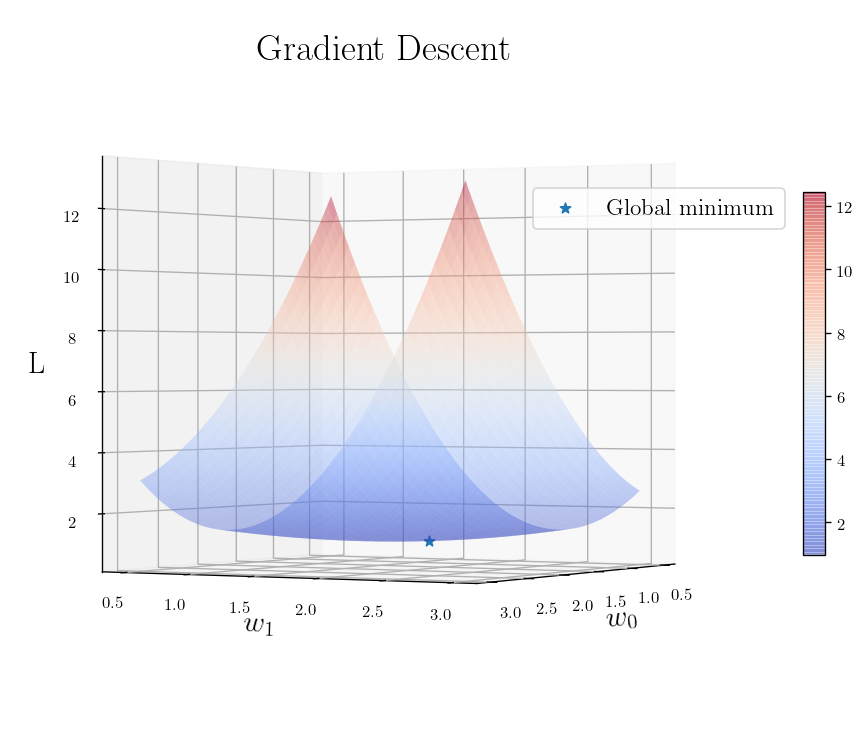

In [23]:
plot_L_2_Loss_function()
plt.show()


(<Figure size 1200x960 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f676f528898>)

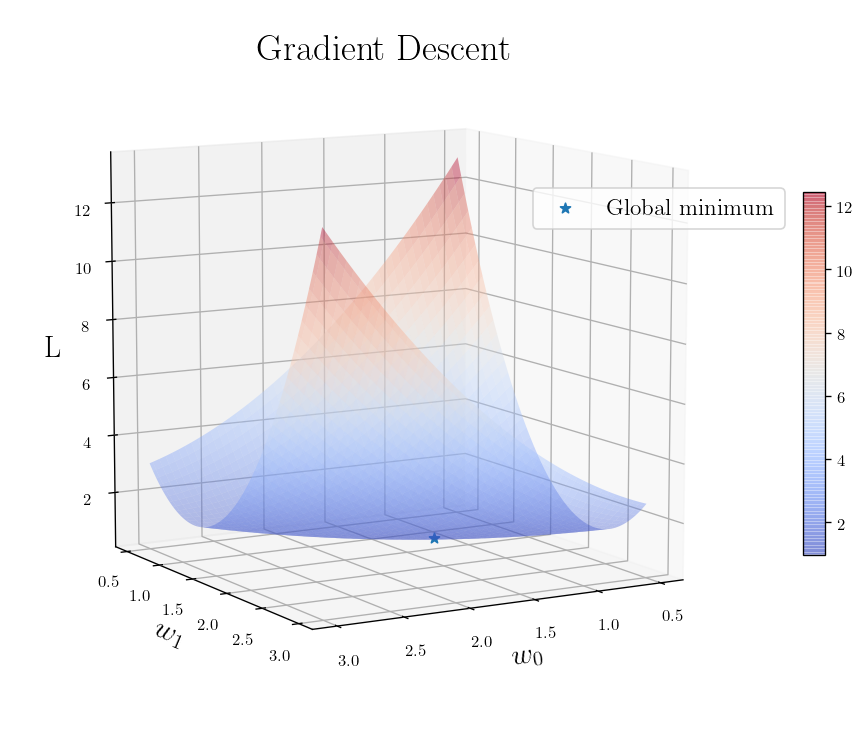

In [24]:
plot_L_2_Loss_function([10, 60])

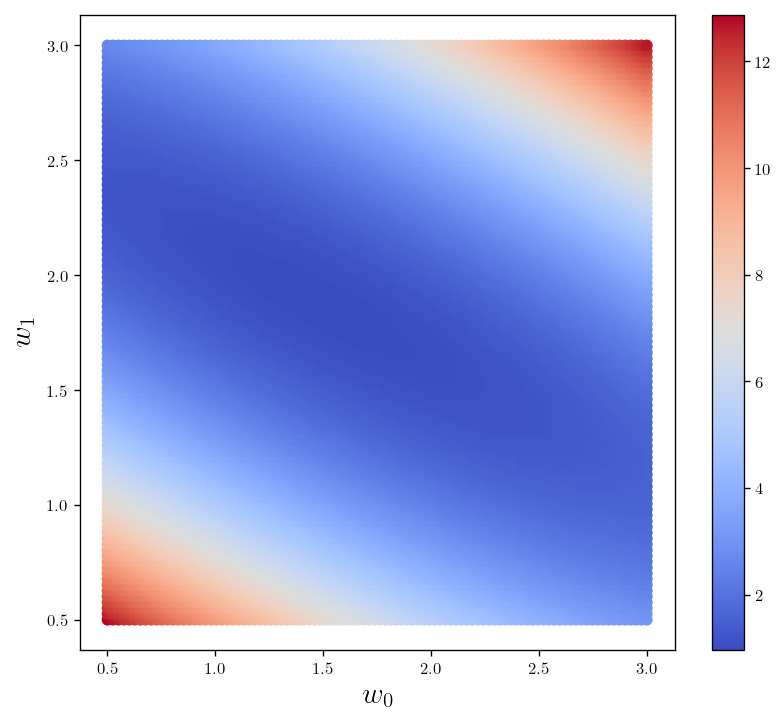

In [25]:
def L_2_heatmap():
    fig = plt.figure(figsize=(8,7))
    plt.scatter(w0, w1, c = z, cmap=cm.coolwarm)

    plt.xlabel(r"$w_0$")
    plt.ylabel(r"$w_1$")

    plt.colorbar()
    return fig

L_2_heatmap()
plt.show()

In [26]:
def Gradient_LR(_X_, _y_, _w_):
    """
    This is the function to find the gradient of the Linear regression
    loss function:
    
    gradient(L_2)_w = (2 / N) * X^T * (X*w - y) 
    
    N: Number of examples
    n: Number of features (including the intercept)
    
    INPUT:
    ======
            _X_ (a matrix of size (N, n)) : 
                                            [[X11=1, X12, ..., X1n],
                                             [X21=1, X22, ..., X2n],
                                             .
                                             .
                                             .
                                             [XN1=1, XN2, ..., XNn]]
           
           
           _y_ (a vector (matrix) of size (N, 1)): [[y1],
                                                    [y2],
                                                    .
                                                    .
                                                    .
                                                    [yN]]
                                                    
                                                
           _w_ (a vector (matrix) of size (n, 1)): [[w0],
                                                    [w1],
                                                    [w2],
                                                    .
                                                    .
                                                    .
                                                    [wn]]
                                                    
    OUTPUT:
    ======
           
            The gradient vector in the shape (n, 1)
     
    """
    
    
    # Finding the number of examples and features
    Num = len(_y_) # N
    num = len(_w_) # n
    
    # Reshaping _y_ with shape(1, N) to (N, 1)
    _y_ = np.reshape(_y_, (Num, 1))
    # Reshaping _w_ with shape(1, n) to (n, 1)
    _w_ = np.reshape(_w_, (num, 1))
        
    
    # single loss: (X.w - y)
    _Loss_ = _X_.dot(_w_) - _y_
    
    # 2/num * X^T (n, N) * loss (N, 1) 
    grad_sum_loss = (2/Num) * _X_.T.dot(_Loss_)
    return grad_sum_loss
    

### Finding learning rate/walking steps

$$
\begin{equation*}
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(w)}
\end{equation*}
$$

In [27]:
def BGD(X_b, y, eta=0.1, n_iterations=100):
    m = len(y)
    theta = np.random.randn(2,1)
    
    theta_list = []
    for iteration in range(n_iterations):
        gradients = Gradient_LR(X_b, y, theta)
        theta = theta - eta * gradients
        theta_list.append(theta)
    return theta, theta_list

def plot_batch_gradient_descent(X, y, theta_l, eta):
    plt.plot(X, y, ".", color="indigo")
    x_0, x_1 = min(X), max(X)
    
    for i, theta in enumerate(theta_l):
        b, m = theta[0], theta[1]
        def f(x): return m*x+b
        colors = ["#039F1B", "orangered"]
        if i==0: 
            color=colors[i] 
        else: 
            color=colors[-1] 
        
        plt.plot([x_0, x_1], [f(x_0), f(x_1)], color=color)
        plt.title(r"$\eta={}$".format(eta))

Now let's plot the _Batch Gradient Descent_ for $\eta = [0.002, 0.02, 0.1, 0.2, 0.4, 0.8]$:

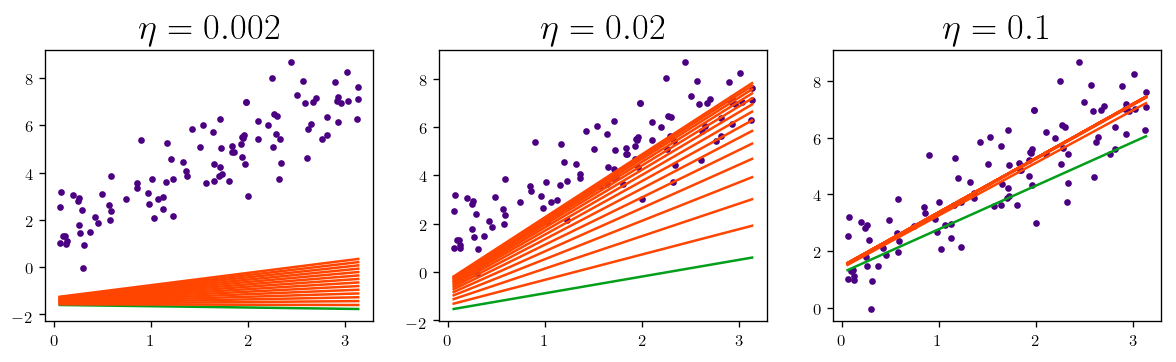

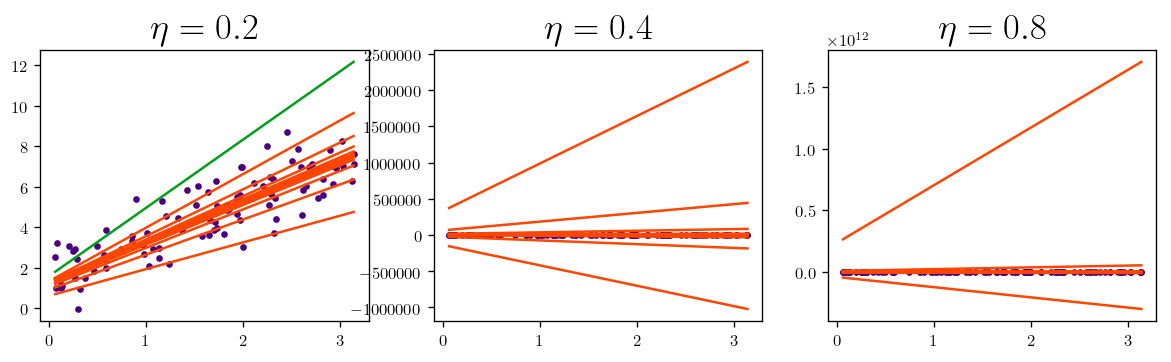

In [28]:
np.random.seed(55)

plt.figure(figsize=(12,3))

etas = [0.002, 0.02, 0.1]
for eta, sp in zip(etas, [131, 132, 133]):
    theta, theta_l = BGD(X_b, y, eta, 15)
    plt.subplot(sp);plot_batch_gradient_descent(X, y, theta_l, eta)

    
plt.figure(figsize=(12,3))
etas = [0.2, 0.4, 0.8]
for eta, sp in zip(etas, [131, 132, 133]):
    theta, theta_l = BGD(X_b, y, eta, 15)
    plt.subplot(sp);plot_batch_gradient_descent(X, y, theta_l, eta)



In [29]:
theta, theta_l = BGD(X_b, y, eta=0.02, n_iterations=105)

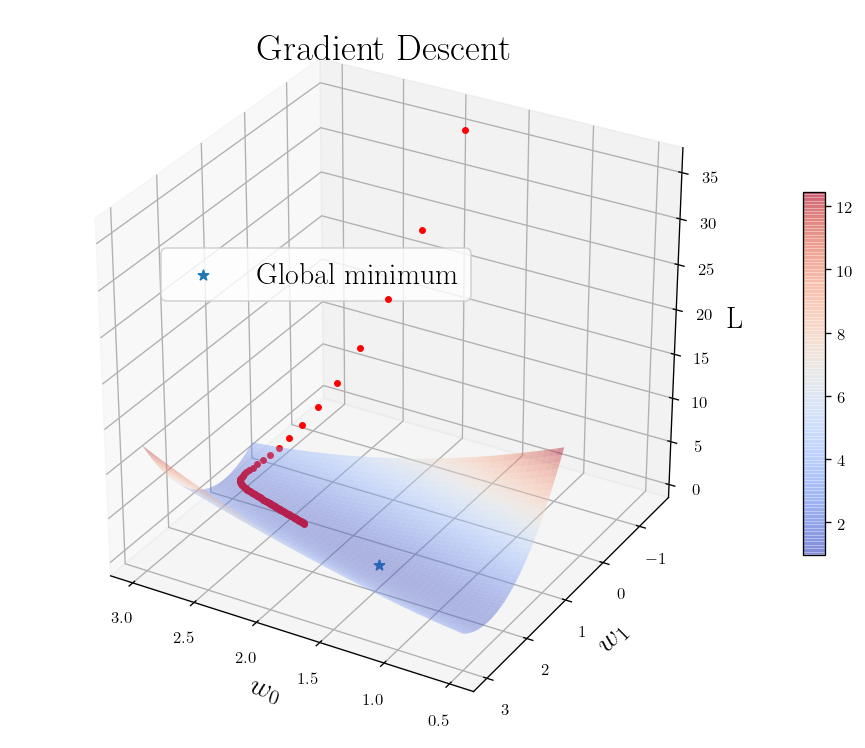

In [30]:
fig, ax = plot_L_2_Loss_function([30, 120])

for i, theta in enumerate(theta_l):
    ax.scatter3D(theta[0], theta[1], weight_space(theta), s=40, marker=".", color = "r")
    
plt.legend(loc=(0.2,0.6))

plt.show()

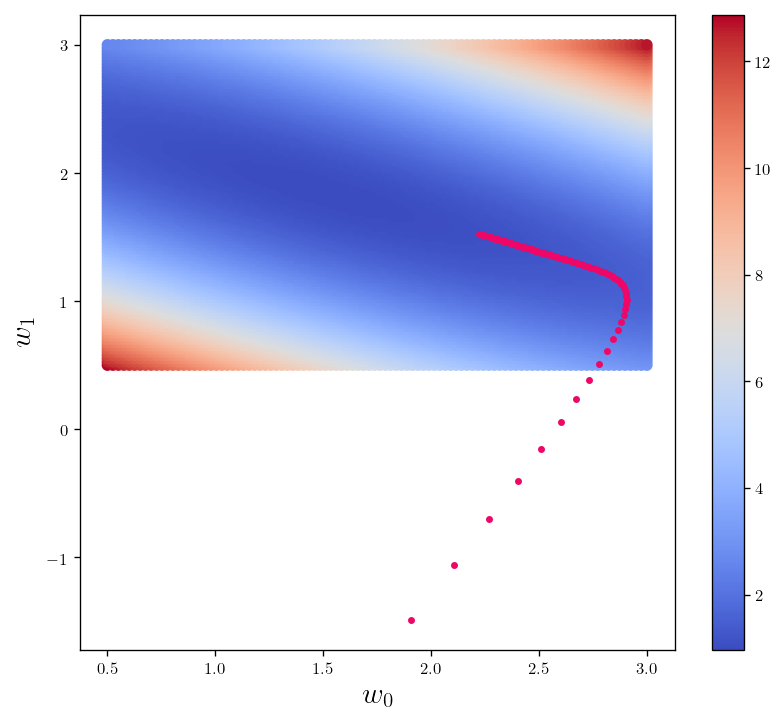

In [31]:
L_2_heatmap()

for i, theta in enumerate(theta_l):
    plt.scatter(theta[0], theta[1],  s=40, marker=".", c = "#EE0766")



Text(0.5, 0, 'Number of iterations')

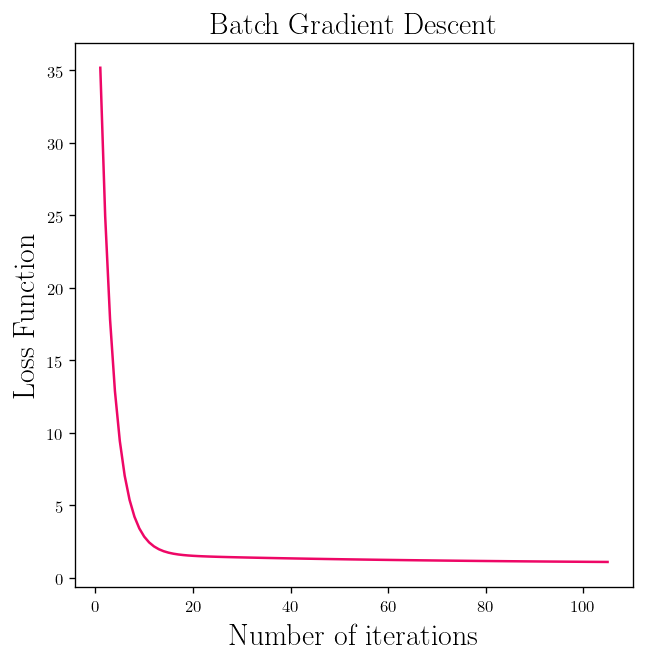

In [32]:
l_2 = []
for theta in theta_l:
    l_2.append(weight_space(theta))

l_2 = [l2[0] for l2 in l_2]

plt.title(r"Batch Gradient Descent", fontsize=18)
plt.plot(range(1, len(l_2)+1), l_2,  c = "#EE0766")

plt.ylabel(r"Loss Function")
plt.xlabel(r"Number of iterations")


The convergence of the batch gradient descent when the function (cost function) is convex and it has continuous derivative is $O(n^{-1})$ in which $n$ is the number of iterations. So if you are looking to get 10 time more accurate you need to iterate 10 times more. (With constant learning rate) 

Now let's take a look at another way for finding the optimal point on our cost function:

# Optimization: Stochastic Gradient Descent


In the stochastic gradient descent (SGD) we are going to update the parameter for each example instead of finding $L_2$ on all of the examples:

### Finding learning rate/walking steps

$$
\begin{equation*}
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(w, X_j, y_j)}
\end{equation*}
$$

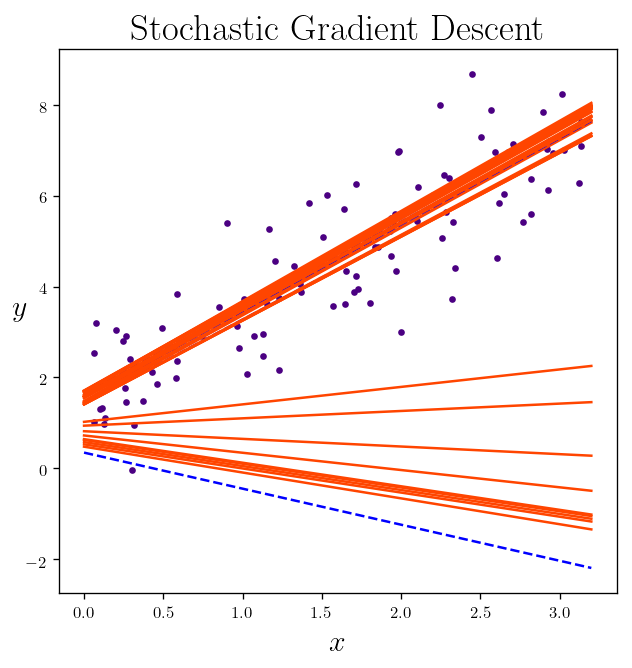

In [33]:
eta = 0.009
num_interation = 200
np.random.seed(110)
theta = np.random.randn(2,1)  # random initialization
theta_batch = [theta]


plt.scatter(X, y, marker=".", color="indigo")

j=0
for iteration in range(num_interation):
    lenght_y = len(y)
    
    for i in range(lenght_y):
        random_index = np.random.randint(lenght_y)
        xi =  X_b[random_index]
        yi = y[random_index]
        
        
        gradients = 2 * xi*(xi.dot(theta) - yi)
        gradients = gradients.reshape(2,1)
        theta = theta - eta * gradients
        theta_batch.append(theta)
        
        if i<10 and iteration in {0, 1, 43, 199}:
            y_predict = X_new_b.dot(theta) 
            

            
            style = "orangered" if i > 0 else "b--"         # not shown
            plt.plot(X_new, y_predict, style, label="iteration"+str(iteration+1))

plt.title(r"Stochastic Gradient Descent")
plt.ylabel(r"$y$", rotation=0)
plt.xlabel(r"$x$")

plt.show()

In [34]:
theta_batch = np.array(theta_batch).reshape(len(theta_batch),2)

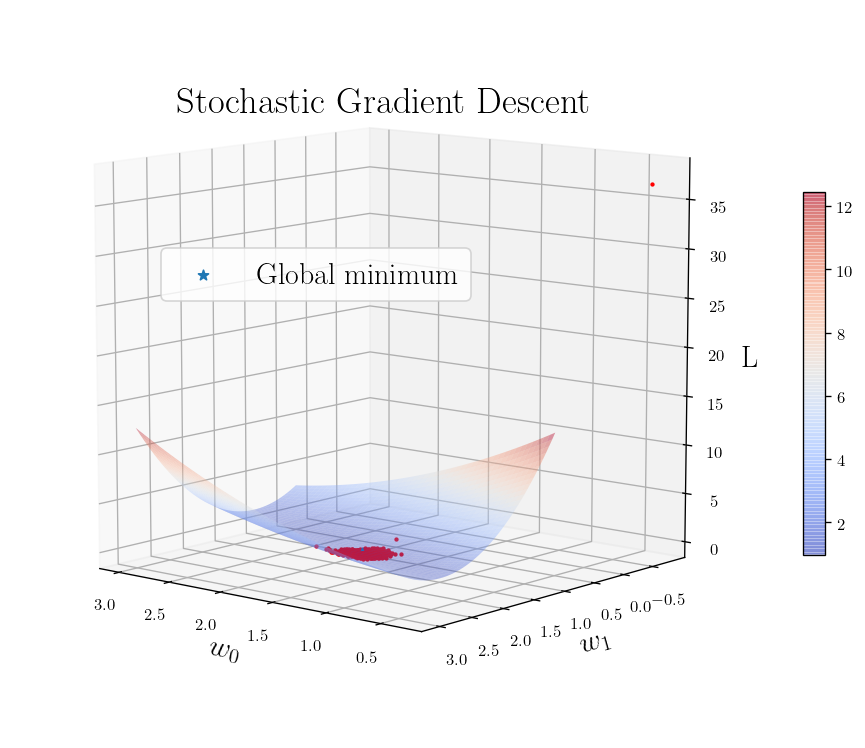

In [35]:
fig, ax = plot_L_2_Loss_function([10, 130])

for i, theta in enumerate(theta_batch[::20]):
    ax.scatter3D(theta[0], theta[1], weight_space(theta), s=10, marker=".", color = "r")
    
plt.legend(loc=(0.2,0.6))
plt.title(r"Stochastic Gradient Descent")

plt.show()

(0.5, 3)

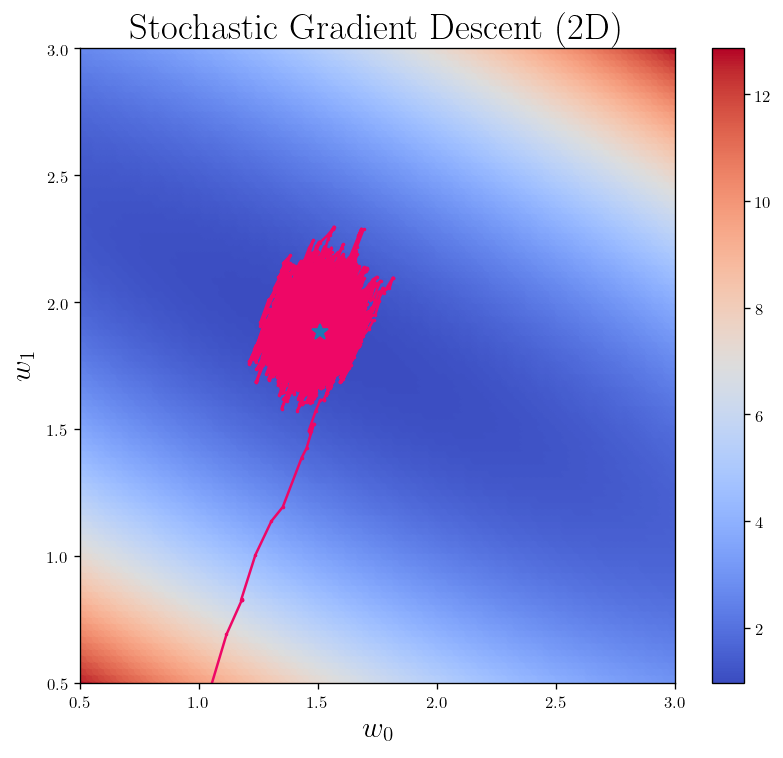

In [36]:
L_2_heatmap()

plt.title(r"Stochastic Gradient Descent (2D)")

plt.scatter(theta_batch[:,0], theta_batch[:, 1],  s=5, marker=".", c = "#EE0766")

plt.plot(theta_batch[:,0], theta_batch[:, 1],  color = "#EE0766")


plt.plot(weight_best[0], weight_best[1], marker="*", markersize =10)

plt.xlim(0.5, 3)
plt.ylim(0.5, 3)

As you can the loss function does not always decrease:

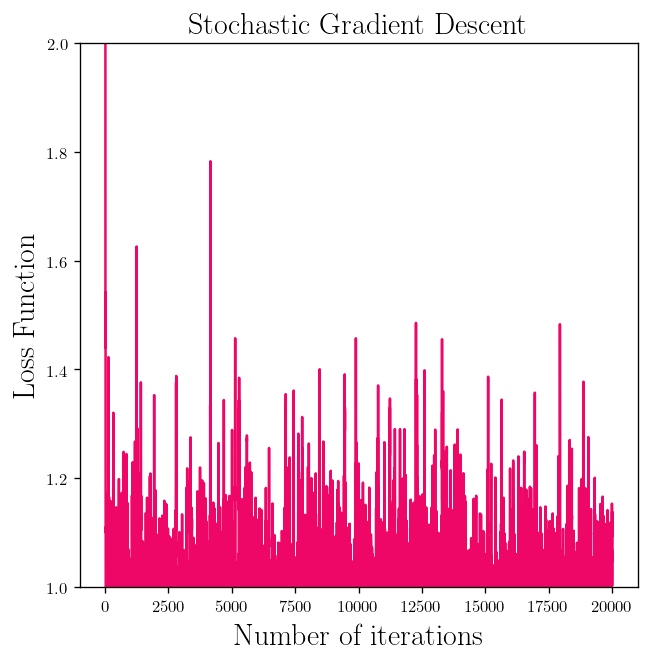

In [37]:
l_2 = []
for theta in theta_batch:
    l_2.append(weight_space(theta))

l_2 = [l2[0] for l2 in l_2]

plt.title(r"Stochastic Gradient Descent", fontsize=18)
plt.plot(range(1, len(l_2)+1), l_2,  c = "#EE0766")

plt.ylabel(r"Loss Function")
plt.xlabel(r"Number of iterations")

plt.ylim(1,2)

plt.show()

Let's define a learning schedule by changing the learning rate: (Making adaptive learning rate)

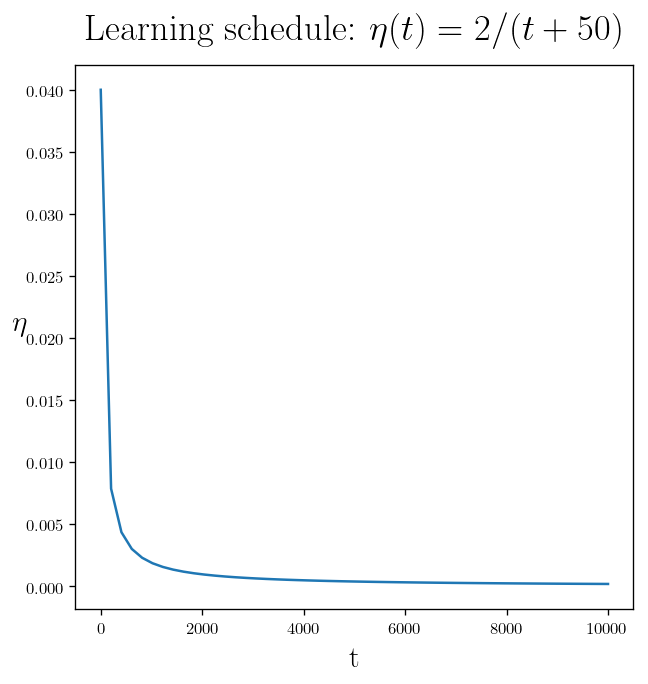

In [38]:
t0, t1 = 2, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)


t_span = np.linspace(0, 10000)
plt.plot(t_span, np.vectorize(learning_schedule)(t_span))


Title = r"Learning schedule: " + r"$\eta(t) = {}/(t+{})$".format(t0, t1)
plt.title(Title, y=1.03)


plt.xlabel(r"t")
plt.ylabel(r"$\eta$", rotation = 0)

plt.show()

In [39]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(99)

This is a function to find the optimal point by moving randomly within data points and updating the value of the weights in according to the gradient of the loss function at that point. So we should remember that the loss function here only depend on the position of one point every time not the poisition of all the data points which means that although we are moving along the opposite of the gradient of the loss function, we could perform worse since that the gradient is only representative of the loss function at that particular point and not necesseraily rest of the data points. That is why we see huge fluctuation in the performance (Loss function vs number of iterations)

In [40]:
def SGD(X_b, y, eta=0.02, num_interation=100, seed=110, schedule=None):
    """
    Stochastic Gradient Descent for linear regression:
    
    This is a function to find the optimal point by moving 
    randomly within data points and updating the  value of
    the weights in according to the gradient  of the  loss 
    function at that point. So we should remember that the 
    loss function here only depend on  the position of one 
    point every time not the poisition  of  all  the  data 
    points which means that although  we  are moving along 
    the opposite of the gradient of  the loss function, we 
    could perform worse  since that  the  gradient is only 
    representative of the loss function at that particular 
    point and not necesseraily rest of the data points. 
    
    
    INPUT:
    ------
     
    """
    import numpy as np
    
    # Definig the learning schedule function with the 
    # following learning schedule hyperparameters :
    t0, t1 = 2, 50 
    
    def learning_schedule(t):
        return t0 / (t + t1)
    
    # pass the seed to the numpy.random.seed 
    np.random.seed(seed)
    
    # randomly assigning weights with the size of of number of features 
    theta = np.random.randn(len(X_b[0]),1)  # random initialization
    
    # a list that will store every weights steps
    theta_batch = [theta]
    
    # A for loop for the number of iteratations of going through the data
    # the default number is 100
    for iteration in range(num_interation):
        # finding number of examples
        lenght_y = len(y)
        
        # A for loop for going through every example, and to update the 
        # weights accordingly
        for i in range(lenght_y):
            # choosing a random index
            random_index = np.random.randint(lenght_y)
            
            # Finding corresponding data for the index
            xi =  X_b[random_index]
            yi = y[random_index]

            # Finding the gradient at this point (xi, yi)
            gradients = 2 * xi*(xi.dot(theta) - yi)
            gradients = gradients.reshape(2,1)
            
            # if it is true will update the learning rate every time, look 
            # at the learning_schedule function for more details about this 
            # option
            if schedule:
                eta = learning_schedule(lenght_y*(iteration)+i)
                
            # Update the weights according to the gradient 
            theta = theta - eta * gradients
            
            # Store it in the weights list
            theta_batch.append(theta)
            
    return theta_batch      
    
theta_ = SGD(X_b, y, 0.0001, schedule=True)

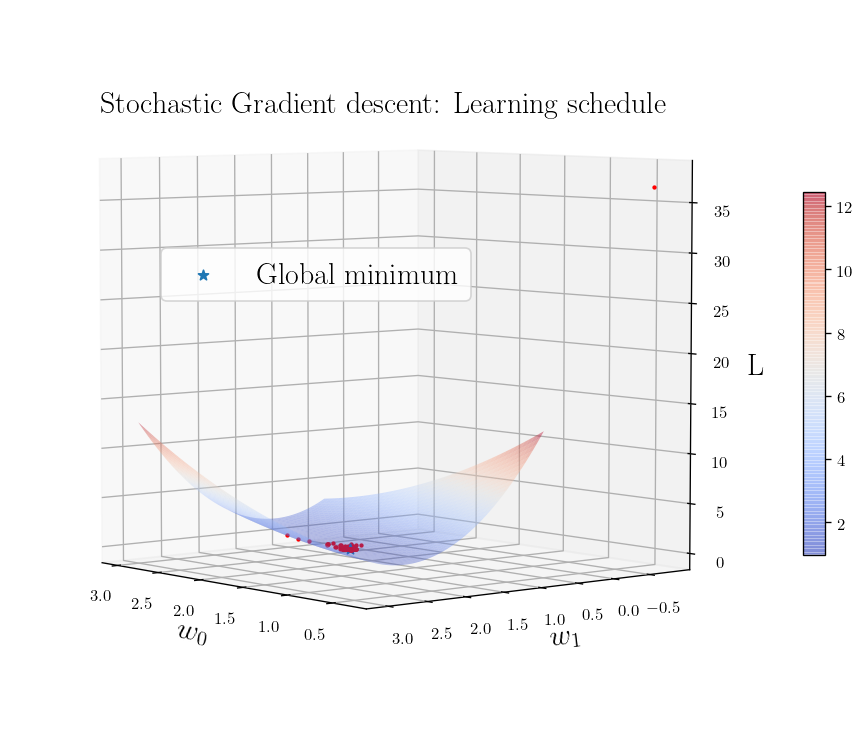

In [41]:
fig, ax = plot_L_2_Loss_function([5, 140])

for i, theta in enumerate(theta_[::20]):
    ax.scatter3D(theta[0], theta[1], weight_space(theta), s=10, marker=".", color = "r")
    
plt.legend(loc=(0.2,0.6))

plt.title(r"Stochastic Gradient descent: Learning schedule", fontsize = 18)


plt.show()

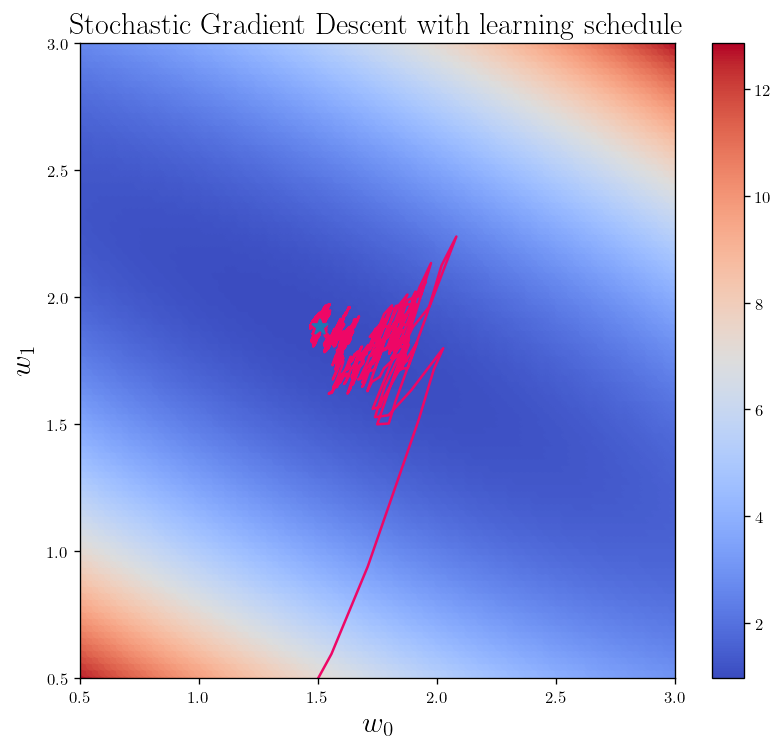

In [42]:
L_2_heatmap()
theta_ = np.array(theta_).reshape(len(theta_),2)

plt.plot(theta_[:,0], theta_[:, 1], color="#EE0766")#  s=5, marker=".", c = "#EE0766")

plt.plot(weight_best[0], weight_best[1], marker="*", markersize=10)

plt.xlim(0.5, 3)
plt.ylim(0.5, 3)

plt.title(r"Stochastic Gradient Descent with learning schedule", fontsize = 18)

plt.show()

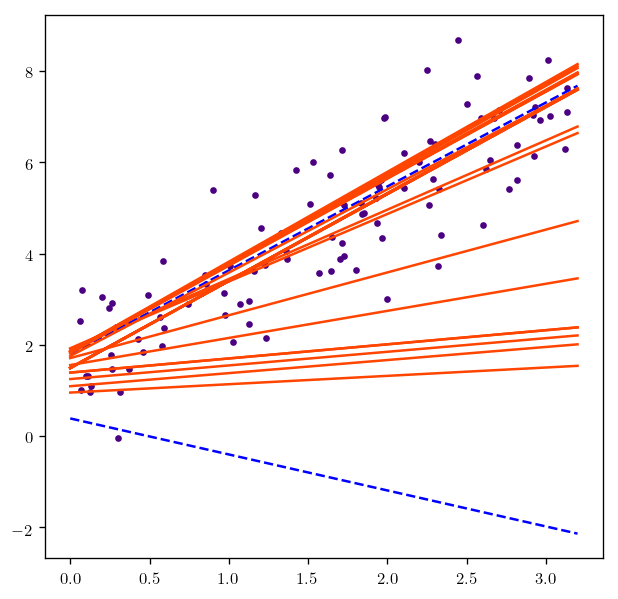

In [43]:
def Find_plot_SGD(X, y, eta=0.02, num_interation=100, seed=110, schedule=None):
    np.random.seed(seed)
    theta = np.random.randn(2,1)  # random initialization
    theta_batch = [theta]

    
    fig = plt.scatter(X, y, marker=".", color="indigo")

    j=0
    for iteration in range(num_interation):
        lenght_y = len(y)

        for i in range(lenght_y):
            random_index = np.random.randint(lenght_y)
            xi =  X_b[random_index]
            yi = y[random_index]


            gradients = 2 * xi*(xi.dot(theta) - yi)
            gradients = gradients.reshape(2,1)
            
            if schedule:
                eta = learning_schedule(lenght_y*(iteration)+i)
                
            theta = theta - eta * gradients
            theta_batch.append(theta)

            if i<10 and iteration in {0, 1, 43, 199}:
                y_predict = X_new_b.dot(theta) 



                style = "orangered" if i > 0 else "b--"         # not shown
                plt.plot(X_new, y_predict, style, label="iteration"+str(iteration+1))
    return fig, theta_batch      
    
fig, theta_ = Find_plot_SGD(X, y, 0.001, schedule=True)

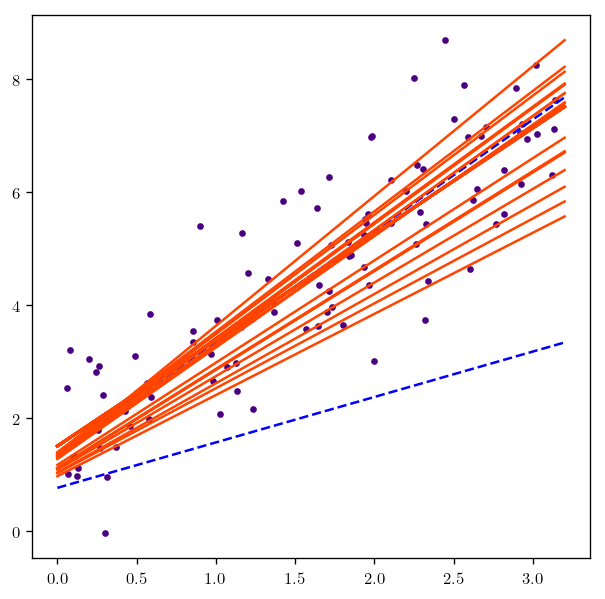

In [44]:
num = 1000
seed = 988

fig2, theta_2_lis = Find_plot_SGD(X,y, num_interation=num, seed=seed, schedule=True)

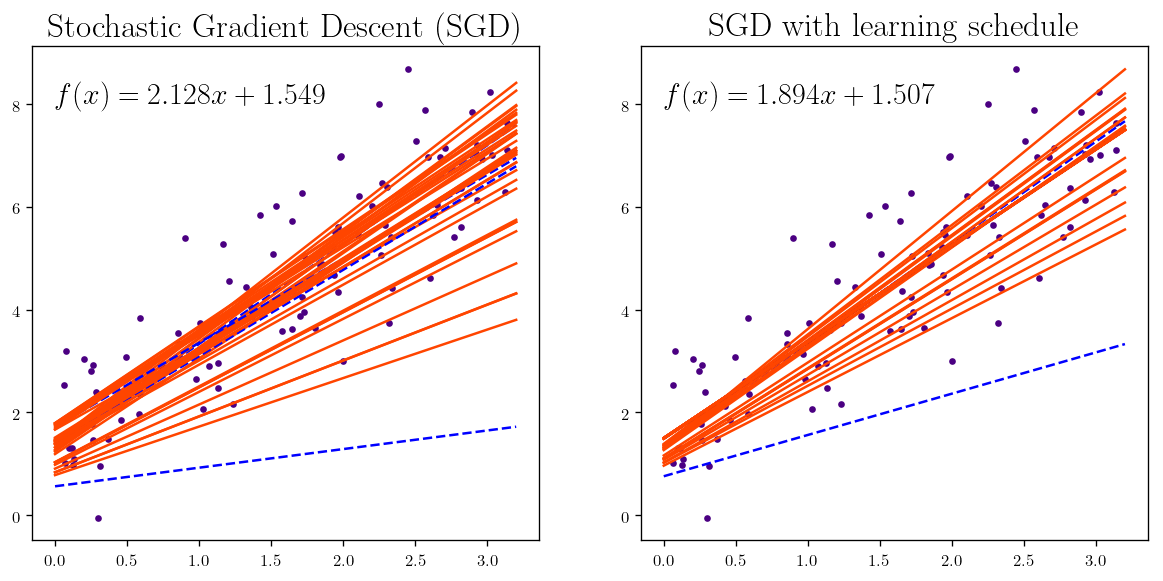

In [45]:
plt.figure(figsize=(12,12))
plt.subplot(221 );
fig1, theta_1_lis = Find_plot_SGD(X,y, num_interation=num, seed=seed, )


plt.text(0, 8, "$f(x) = {}x + {}$".format(round(float(theta_1_lis[-1][1]), 3), round(float(theta_1_lis[-1][0]), 3)))
plt.title(r"Stochastic Gradient Descent (SGD)", fontsize=20)


plt.subplot(222);
fig1, theta_1_lis = Find_plot_SGD(X,y, num_interation=num, seed=seed, schedule=True)


plt.text(0, 8, "$f(x) = {}x + {}$".format(round(float(theta_1_lis[-1][1]), 3), round(float(theta_1_lis[-1][0]), 3)))
plt.title(r"SGD with learning schedule", fontsize=20)

plt.show()

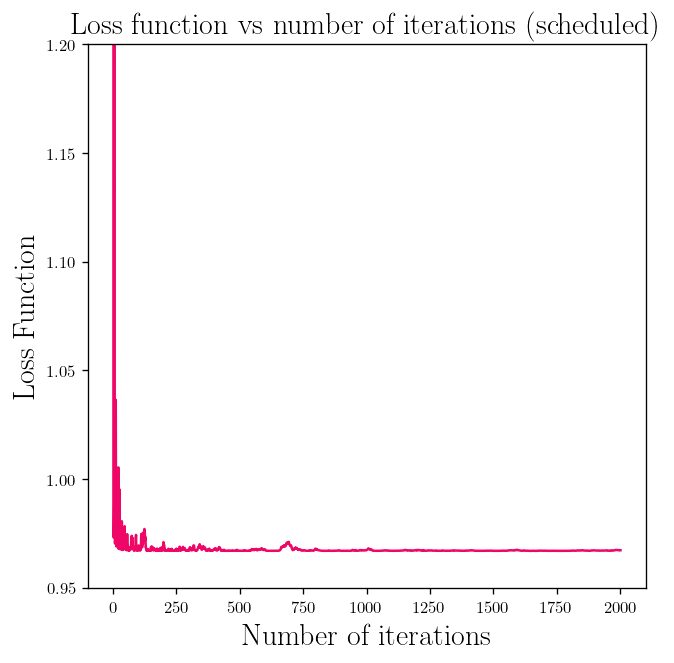

In [242]:
l_2 = []
for theta in theta_2_lis:
    l_2.append(weight_space(theta))

l_2 = [l2[0] for l2 in l_2[::50]]

plt.title(r"Loss function vs number of iterations (scheduled)", fontsize=18)
plt.plot(range(1, len(l_2)+1), l_2,  c = "#EE0766")

plt.ylabel(r"Loss Function")
plt.xlabel(r"Number of iterations")

plt.ylim(0.95, 1.2)

plt.show()

Now let's take a look at the same thing but using `sklearn.linear_model.SGDRegressor`

In [47]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=10000, 
                       tol=-np.infty, 
                       penalty=None, 
                       eta0=0.1, 
                       random_state=88)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=88,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [48]:
sgd_reg_optimal = SGDRegressor(max_iter=10000, 
                             tol=-np.infty, 
                             penalty=None,
                             loss="squared_loss", 
                             early_stopping=True, 
                             learning_rate="optimal",
                             random_state=88)

sgd_reg_optimal.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='optimal', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=88,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [49]:
sgd_reg_valid = SGDRegressor(max_iter=10000, 
                             tol=-np.infty, 
                             penalty=None,
                             loss="squared_loss", 
                             early_stopping=True, 
                             learning_rate="adaptive", 
                             validation_fraction=0.1,
                             random_state=88)

sgd_reg_valid.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=88,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [50]:
print("Intercept: ", sgd_reg.intercept_, "Coefficient: ", sgd_reg.coef_, "with SGD from skit-learn")
print("Intercept: ", sgd_reg_valid.intercept_, "Coefficient: ", sgd_reg_valid.coef_, "with SGD with validations from skit-learn")
print("Intercept: ", sgd_reg_optimal.intercept_, "Coefficient: ", sgd_reg_optimal.coef_, "with Optimal SGD from skit-learn")


print("Intercept: ", weight_best[0], "Coefficient: ", weight_best[1], "with Analytical")

Intercept:  [1.50556557] Coefficient:  [1.8792718] with SGD from skit-learn
Intercept:  [1.50637432] Coefficient:  [1.93995146] with SGD with validations from skit-learn
Intercept:  [1.5075848] Coefficient:  [1.94301] with Optimal SGD from skit-learn
Intercept:  [1.50826931] Coefficient:  [1.88415094] with Analytical


# Mini-batch gradient descent:

This is another way to get around finding the gradient of loss function for all of the data but instead of looking only at one point at a time (in SGD) and instead selecting a subset of data, finding the gradient vector for their corresponding loss function, which is somewhat between 

In [51]:
def Mini_BGD(_X_, _y_, n_epochs=50, mini_batch_size=int(0.1*len(y)), eta=0.1, schedule=None, random_seed=100):
    # Importing numpy
    import numpy as np
    
    # Finding the number of examples and features
    Num = len(_y_) # N examples
    num = len(_X_[0]) # n features
    
    # Definig the learning schedule function with the 
    # following learning schedule hyperparameters :
    t0, t1 = 5, 50 
    
    def learning_schedule(t):
        return t0/(t + t1)

    
    # Weights list
    weights = np.random.randn(num, 1)
    weights_list = []
    
    np.random.seed(random_seed)
    
    # go through n_epochs iterations/epochs
    for epoch in range(n_epochs):
        random_indices = np.random.permutation(Num)
        _X_shuffled = _X_[random_indices]
        _y_shuffled = _y_[random_indices]
        
        for t, j in enumerate(range(0, Num, mini_batch_size)):
            X = _X_shuffled[j:j+mini_batch_size]
            y = _y_shuffled[j:j+mini_batch_size]
            gradients = Gradient_LR(X, y, weights)
            
            if schedule: 
                eta = learning_schedule(t)
            
            weights = weights - eta * gradients
            
            weights_list.append(weights)
            
    return weights_list

In [52]:
weights_list = Mini_BGD(X_b, y)
      

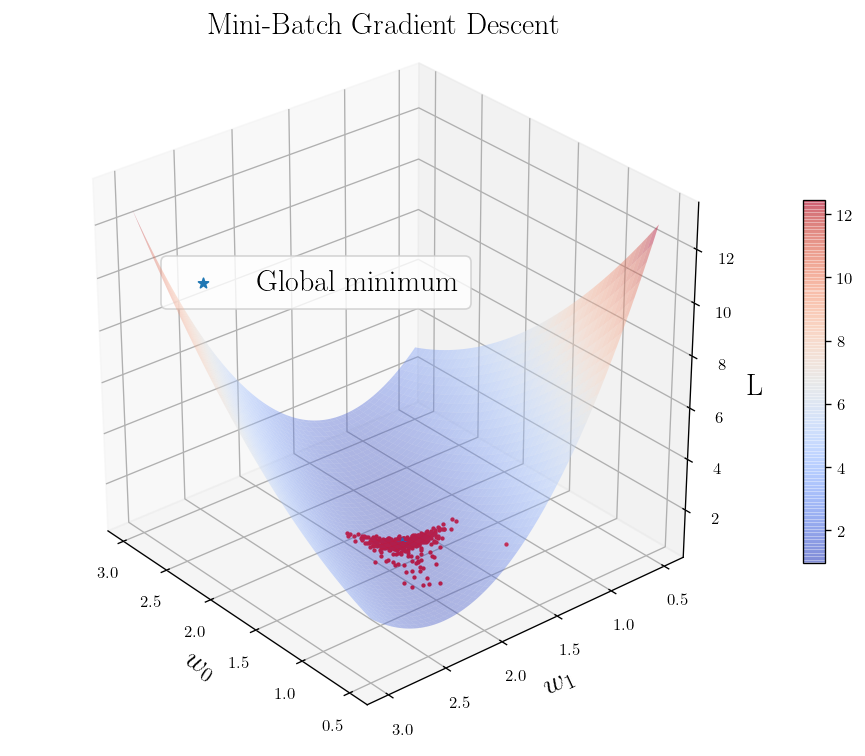

In [53]:
fig, ax = plot_L_2_Loss_function([30, 140])

for i, theta in enumerate(weights_list):
    ax.scatter3D(theta[0], theta[1], weight_space(theta), s=10, marker=".", color = "r")
    
plt.legend(loc=(0.2,0.6))

plt.title(r"Mini-Batch Gradient Descent", fontsize = 18, y=1.05)


plt.show()

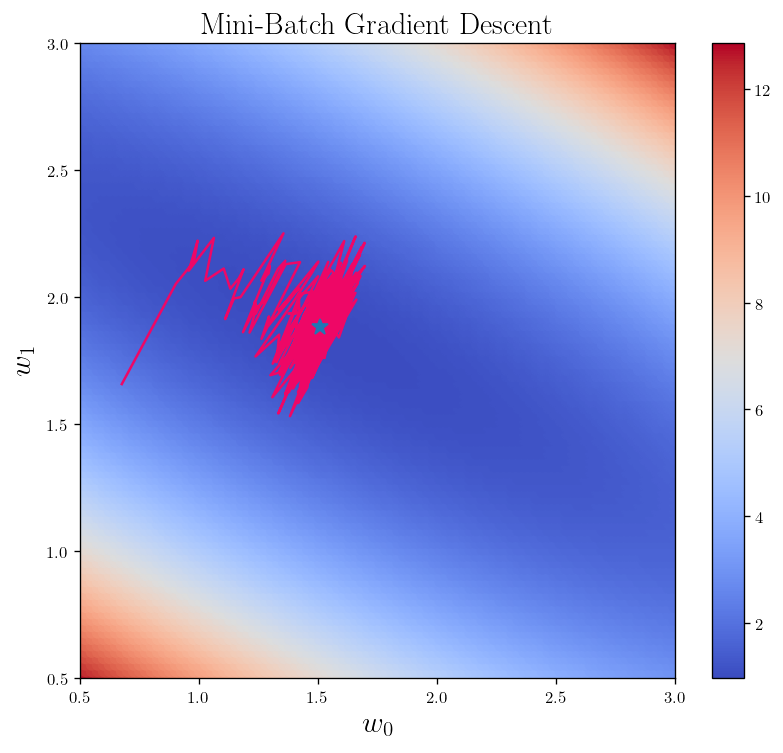

In [54]:
L_2_heatmap()
theta_ = np.array(weights_list).reshape(len(weights_list),2)

plt.plot(theta_[:,0], theta_[:, 1], color="#EE0766")#  s=5, marker=".", c = "#EE0766")

plt.plot(weight_best[0], weight_best[1], marker="*", markersize=10)

plt.xlim(0.5, 3)
plt.ylim(0.5, 3)

plt.title(r"Mini-Batch Gradient Descent", fontsize = 18)

plt.show()

__Discussion on Logistic, lasso, ...__

# Decision Trees:

First start with a special case of **Regression or Classification Tree (CART)**:


A **node** which represents a single input $X$ and we split the data. And there are **Leaf nodes** that are the end results of each branch. 

Take a look at the following example:

In [55]:
np.random.seed(22)

x_c1 = 1.5 * np.random.random(4)
y_c1 = 4 * np.random.random(4)

x_c2 = 2 + 1.5 * np.random.random(5)
y_c2 = 4 * np.random.random(5)



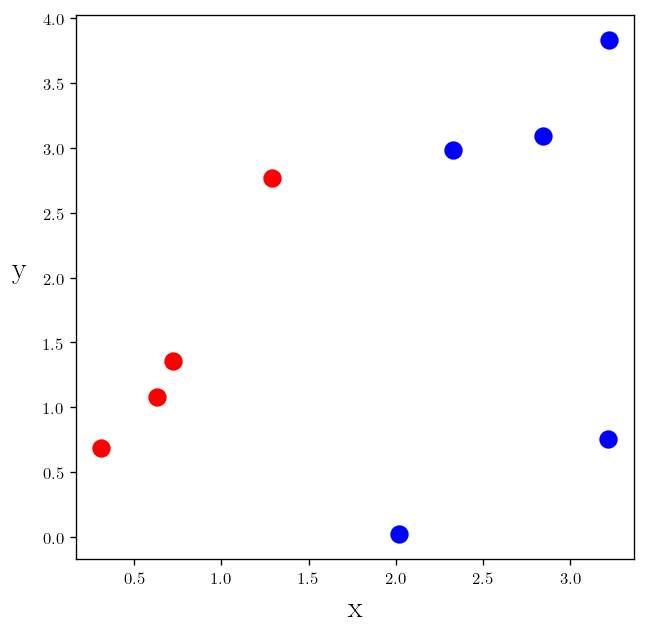

In [56]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.text(s=r"y", x=-0.2, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

As you can see making a decision about a color of a given point we can just use the $x$ values. For example we can say any point with $x>1.8$ is blue and the rest are red.

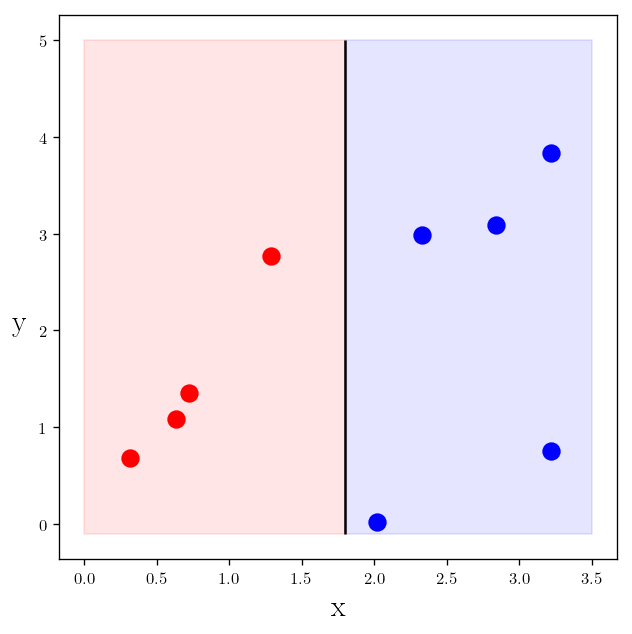

In [57]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.vlines(1.8, -0.1, 5)

plt.fill_between([0, 1.8], [-0.1, -0.1], [5, 5], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)

    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

So this is how our decision tree looks like: 

In [58]:
from _plotting_ import _plot_trees_

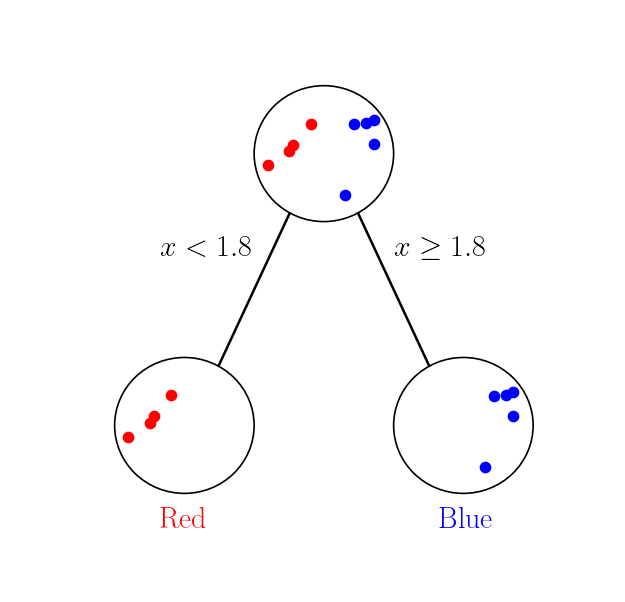

In [60]:
_plot_trees_()

plt.show()

Now let's make another class:

In [94]:
np.random.seed(22)
x_c3 = -0.3 + 2.2*np.random.random(4)
y_c3 = 3.5 + np.random.random(4)

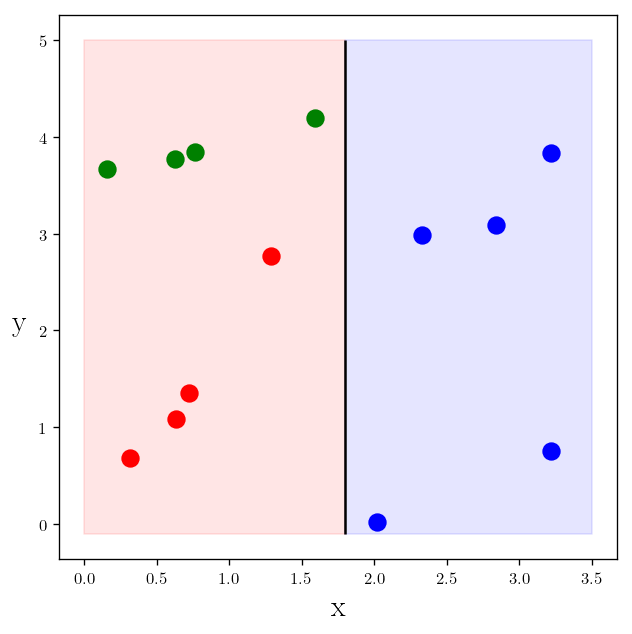

In [95]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)


plt.vlines(1.8, -0.1, 5)

plt.fill_between([0, 1.8], [-0.1, -0.1], [5, 5], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)

    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

In the plot you see the first criteria is not sufficient. So let's tweak it a bit. As you can see our classifier is still good for making decision about blue. But for making decision about green and red, so we need another classifier like $y<3.1$ if $x<1.8$:

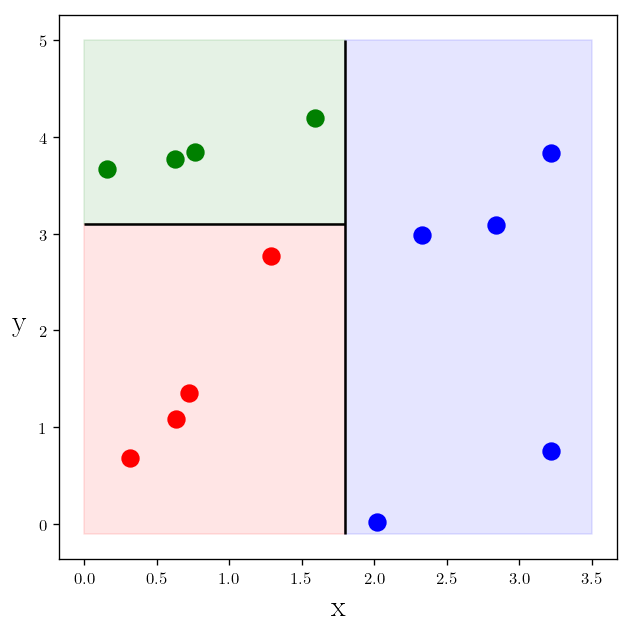

In [99]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)


plt.vlines(1.8, -0.1, 5)
plt.hlines(3.1, 0, 1.8)

plt.fill_between([0, 1.8], [-0.1, -0.1], [3.1, 3.1], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)
plt.fill_between([0, 1.8], [3.1, 3.1], [5, 5], color="green", alpha=0.1)
    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

Which means that we add another branch to a decision tree:

In [233]:
from _plotting_ import _plot_tree_2

ImportError: cannot import name '_plot_tree_2' from '_plotting_' (/home/abtin/Documents/courses/machine_learning/spring_2019/Foundation_applied_machine_learning/notebooks/week6/_plotting_.py)

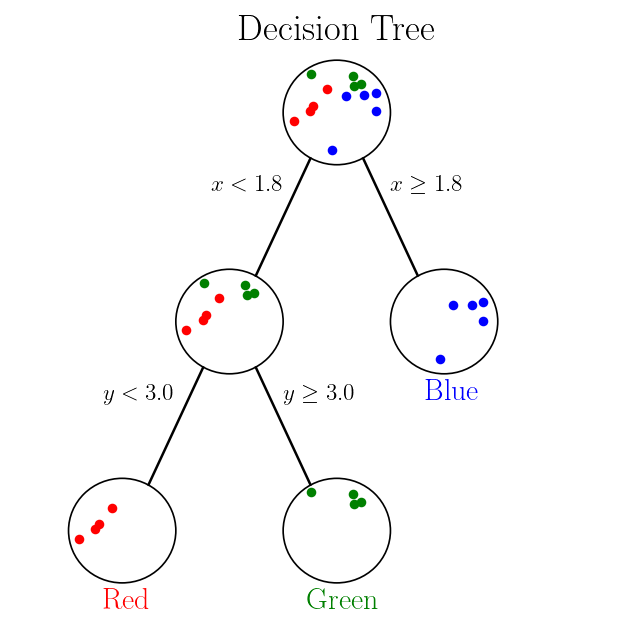

In [237]:
def _plot_tree_2():
    import numpy as np
    import matplotlib.pyplot as plt

    np.random.seed(22)

    x_c1 = 1.5 * np.random.random(4)
    y_c1 = 4 * np.random.random(4)

    x_c2 = 2 + 1.5 * np.random.random(5)
    y_c2 = 4 * np.random.random(5)

    x_c3 = -0.3 + 2.2*np.random.random(4)
    y_c3 = 3.5 + np.random.random(4)


    import math

    centers = [[0.5, 0.6], [0.3, 0.2], [0.7, 0.2], [0.1, -0.2], [0.5, -0.2]]
    radius = 0.1 

    tan_1 = (centers[1][1] - centers[0][1])/(centers[1][0] - centers[0][0])
    tan_2 = (centers[2][1] - centers[0][1])/(centers[2][0] - centers[0][0])

    cos_1 = np.sqrt((1+tan_1**2)**(-1))
    cos_2 = np.sqrt((1+tan_2**2)**(-1))

    sin_1 = 1 - cos_1**2
    sin_2 = 1 - cos_2**2

    offset_points_c1 = [0.1*np.log10(x_c1)-0.3*0.1, 0.1*np.log10(y_c1)]
    offset_points_c2 = [0.4*np.log10(x_c2)-0.13, 0.05*np.log10(y_c2)+0.008]
    offset_points_c3 = [0.09*x_c3-0.08, 0.1*y_c3-0.338]

    circle1 = plt.Circle(centers[0], radius, fill=False, color="k")
    circle2 = plt.Circle(centers[1], radius, fill=False, color="k")
    circle3 = plt.Circle(centers[2], radius, fill=False, color="k")
    circle4 = plt.Circle(centers[3], radius, fill=False, color="k")
    circle5 = plt.Circle(centers[4], radius, fill=False, color="k")

    fig, ax = plt.subplots()

    size_ = 9.5

    plt.plot(centers[0][0]+offset_points_c1[0], 
             centers[0][1]+offset_points_c1[1], "r.", markersize=size_)

    plt.plot(centers[0][0]+offset_points_c2[0], 
             centers[0][1]+offset_points_c2[1], "b.", markersize=size_)

    plt.plot(centers[0][0]+offset_points_c3[0], 
             centers[0][1]+offset_points_c3[1], "g.", markersize=size_)


    # circle 2
    plt.plot(centers[1][0]+offset_points_c3[0], 
             centers[1][1]+offset_points_c3[1], "g.", markersize=size_)



    # circle 3
    plt.plot(centers[1][0]+offset_points_c1[0], 
             centers[1][1]+offset_points_c1[1], "r.", markersize=size_)

    plt.plot(centers[2][0]+offset_points_c2[0], 
             centers[2][1]+offset_points_c2[1], "b.", markersize=size_)


    # circle 4
    plt.plot(centers[3][0]+offset_points_c1[0], 
             centers[3][1]+offset_points_c1[1], "r.", markersize=size_)

    # circle 5
    plt.plot(centers[4][0]+offset_points_c3[0], 
             centers[4][1]+offset_points_c3[1], "g.", markersize=size_)




    plt.plot([centers[1][0]+1.1*radius*cos_1, centers[0][0]-1.1*radius*cos_1], 
             [centers[1][1]+1.1*radius*sin_1, centers[0][1]-1.1*radius*sin_1], color="k")

    plt.plot([centers[2][0]-1.1*radius*cos_2, centers[0][0]+1.1*radius*cos_2], 
             [centers[2][1]+1.1*radius*sin_2, centers[0][1]-1.1*radius*sin_2], color="k")



    plt.plot([centers[1][0]-1.1*radius*cos_1, centers[3][0]+1.1*radius*cos_1], 
             [centers[1][1]-1.1*radius*sin_1, centers[3][1]+1.1*radius*sin_1], color="k")

    plt.plot([centers[1][0]+1.1*radius*cos_2, centers[4][0]-1.1*radius*cos_2], 
             [centers[1][1]-1.1*radius*sin_2, centers[4][1]+1.1*radius*sin_2], color="k")




    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    ax.add_artist(circle4)
    ax.add_artist(circle5)





    plt.text(centers[1][0]-0.035, centers[1][1]+0.25, r"$x < 1.8$", fontsize=14)
    plt.text(centers[2][0]-0.1, centers[2][1]+0.25, r"$x \geq 1.8$", fontsize=14)

    plt.text(centers[3][0]-0.035, centers[3][1]+0.25, r"$y < 3.0$", fontsize=14)
    plt.text(centers[4][0]-0.1, centers[4][1]+0.25, r"$y \geq 3.0$", fontsize=14)

    plt.text(centers[2][0]-0.035, centers[2][1]-0.15, r"Blue", color="b")
    plt.text(centers[3][0]-0.035, centers[3][1]-0.15, r"Red", color="r")
    plt.text(centers[4][0]-0.055, centers[4][1]-0.15, r"Green", color="g")


    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.32, 0.72)

    plt.axis("off")


    plt.title(r"Decision Tree")

    return fig, ax


_plot_tree_2()
plt.show()

Now let's define a concept of a **Gini Impurity**.

# Gini Impurity:

Let's go to this example again:

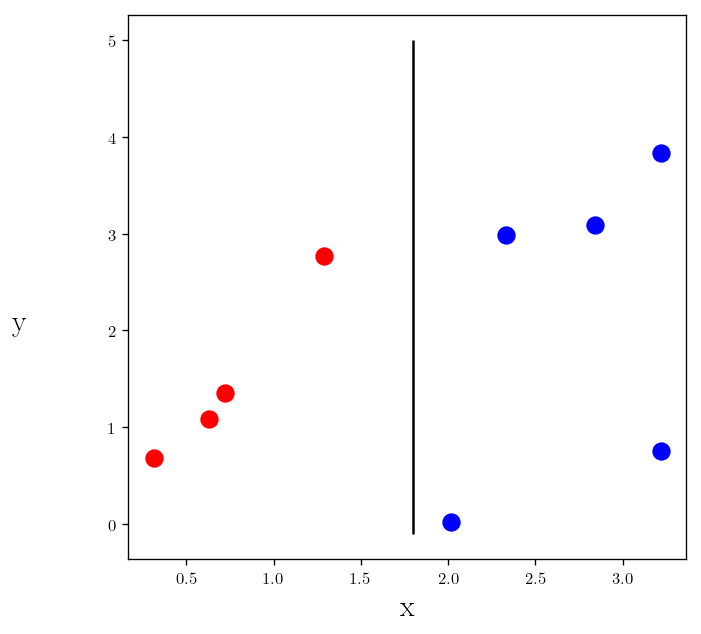

In [246]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.vlines(1.8, -0.1, 5)

    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

So this is how does the split works:
* Left branch has 4 Reds
* Right branch has 5 Blues

Which is a perfect split but what about $x<2.1$ as our classifier:

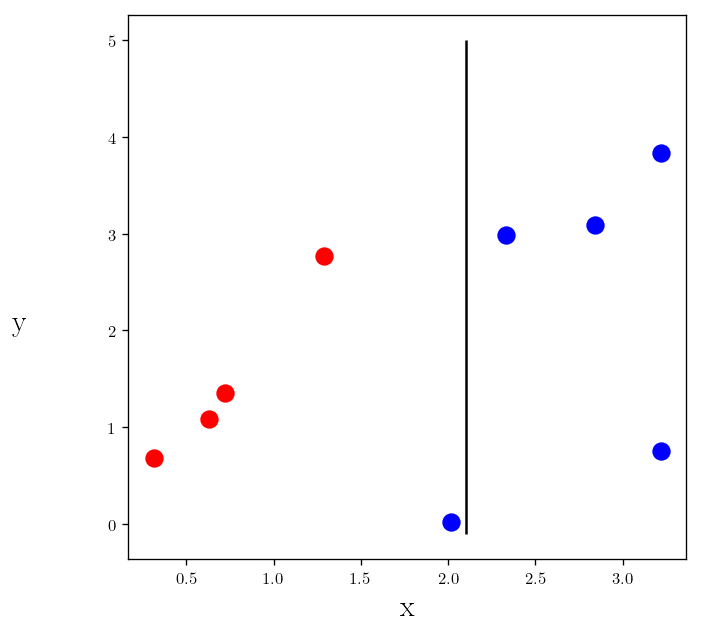

In [247]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.vlines(2.1, -0.1, 5)

    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

* Left branch has 4 Reds and 1 Blue
* Right branch has 4 Blues

How can we define a quantitative measure for how good our split is **Gini impurity**.

If $C$ is the set of our classes and $p(c)$ is the probability of a picking a datapoint with class $c \in C$, then the **Gini impurity** is:
$$
\begin{equation*}
G = \sum_{c \in C} p(c) (1 - p(c))
\end{equation*}
$$

In our example we have for the root node:

$$
\begin{equation*}
G_0 = p(\textrm{Blue}) (1 - p(\textrm{Blue})) + p(\textrm{Red}) (1 - p(\textrm{Red})) \\
G_0 = 5/9 * (1 - 5/9) + 4/9 * (1 - 4/9) = 0.494
\end{equation*}
$$



And for the left and right branch of perfect classifier we have:

$$
\begin{equation*}
G_{Left} = 1 * (1-1) = 0 \\
G_{Right} = 1 * (1-1) = 0
\end{equation*}
$$

Which is a perfect score and means that we have a perfect classifier.


But in the case of our imperfect example we have:
$$
\begin{equation*}
G_{Left} = 4/5 * (1-4/5) + 1/5 * (1-1/5) = 0.32 \\
G_{Right} = 1 * (1-1) = 0
\end{equation*}
$$

Which shows that our left branch has some impurity in it with the measure of $G=0.32$.


We will determine the quality of the split by weighting the impurity of each branch by how many elements it has. which means:

$$
\begin{equation*}
G_1 = (4/9 * 0) + 5/9 * (0.32) = 0.178
\end{equation*}
$$


So the change in impurity means is the **Gini Gain**:

$$
\begin{equation*}
\Delta G = G_0 - G_1 = 0.5 - 0.178 = 0.32
\end{equation*}
$$


So the higher the Gini gain the better classification we have (better splits). So we make a decision based on the highest Gini gain.

## Train the nodes:

First let's choose set of possible splits:


In [351]:
splits = [0.4, 0.67, 1, 1.8, 2.2, 2.5, 3.1]

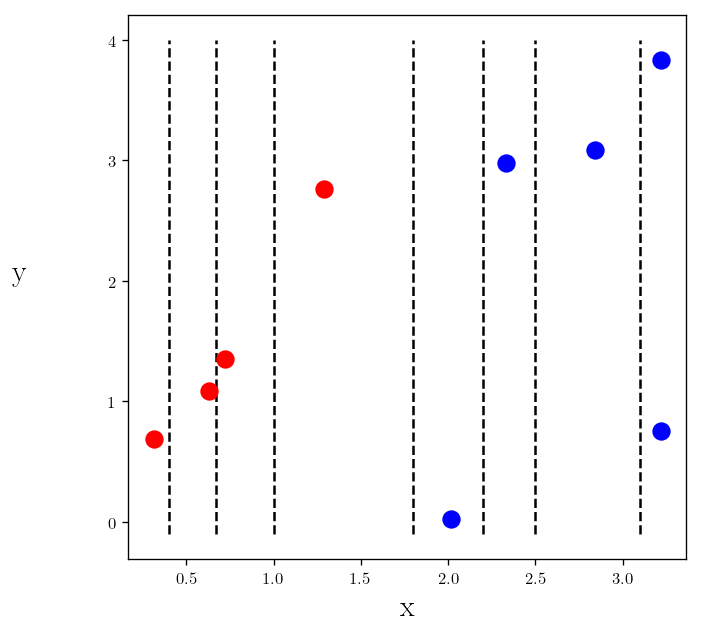

In [550]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
for split in splits:
    plt.vlines(split, -0.1, 4, linestyles="dashed")

    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

In [562]:
@np.vectorize
def gini(p): return p * (1 - p)

def Gini_impurity(groups):
    prob = np.zeros(len(groups))
    
    tot=0
    
    if len(groups) == 1:
        return 0
    
    for i, group in enumerate(groups):
        group_size = len(group)
        prob[i] = group_size
        tot+=group_size
        
    prob = prob/tot
    gini_vec = gini(prob)
    
    
    return sum(gini_vec)

In [563]:
_dic_ = {"r" : x_c1, "b" : x_c2} 

def split_data(data, splits):
    _list_of_groups_splits = []
    for split in splits:
        _list_of_groups_splits.append([data[data<=split], data[data>split]])
    return _list_of_groups_splits


def devide_to_subgroups(_list_of_groups_splits, _dic_):
    keys = list(_dic_.keys())
    Full= []
    
    for groups in _list_of_groups_splits:
        dummy1 = []
        for group in groups:
            dummy ={key:[] for key in keys}
            
            for key in keys:
                for e in group:
                    if e in _dic_[key]:
                        dummy[key].append(e)
            full_g = [dummy[key] for key in keys if dummy[key]]
            dummy1.append(full_g)
            
        Full.append(dummy1)
    return Full

In [564]:
x_c12 = np.append(x_c1, x_c2)
y_c12 = np.append(y_c1, y_c2)

groups_splited = devide_to_subgroups(split_data(x_c12, splits), _dic_)

In [565]:
root_node = [x_c1, x_c2]

G0 = Gini_impurity(root_node)
print("The Gini Impurity for the root node is =", G0, "\n", "===\n")

gains = []

for i, group in enumerate(groups_splited):
    
    size0, size1 = len(group[0]), len(group[1])
    gini0, gini1 = Gini_impurity(group[0]), Gini_impurity(group[1])
    
    Average_weighted_gini = (size0 * gini0 + size1 * gini1)/(size0 + size1)
    
    gini_gain = G0 - Average_weighted_gini
    
    gains.append(gini_gain)
    print("The Gini Impurity for split {} is =".format(i+1),round(Average_weighted_gini,3), "\n"
          "The Gini gain is = ", round(gini_gain,3), "\n", "-------\n")

The Gini Impurity for the root node is = 0.49382716049382713 
 ===

The Gini Impurity for split 1 is = 0.312 
The Gini gain is =  0.181 
 -------

The Gini Impurity for split 2 is = 0.272 
The Gini gain is =  0.222 
 -------

The Gini Impurity for split 3 is = 0.185 
The Gini gain is =  0.309 
 -------

The Gini Impurity for split 4 is = 0.0 
The Gini gain is =  0.494 
 -------

The Gini Impurity for split 5 is = 0.213 
The Gini gain is =  0.28 
 -------

The Gini Impurity for split 6 is = 0.296 
The Gini gain is =  0.198 
 -------

The Gini Impurity for split 7 is = 0.327 
The Gini gain is =  0.167 
 -------



Which tells us the split 4 was the best split which was our initial guess:

In [566]:
splits[3]

1.8

In [567]:
gain_split = [(i, j) for i,j in zip(gains, splits)]
gain_split.sort(reverse=True)
gain_split

[(0.49382716049382713, 1.8),
 (0.3086419753086419, 1),
 (0.28049382716049376, 2.2),
 (0.22171831695641214, 0.67),
 (0.1975308641975308, 2.5),
 (0.18132716049382713, 0.4),
 (0.1672965482489292, 3.1)]

Which is the sorted Gini gains and their corresponding splits.


Let's split the y axis in the same fashion:

In [568]:
y_splits = [0.2, 1, 1.2, 2.5, 3, 3.5]

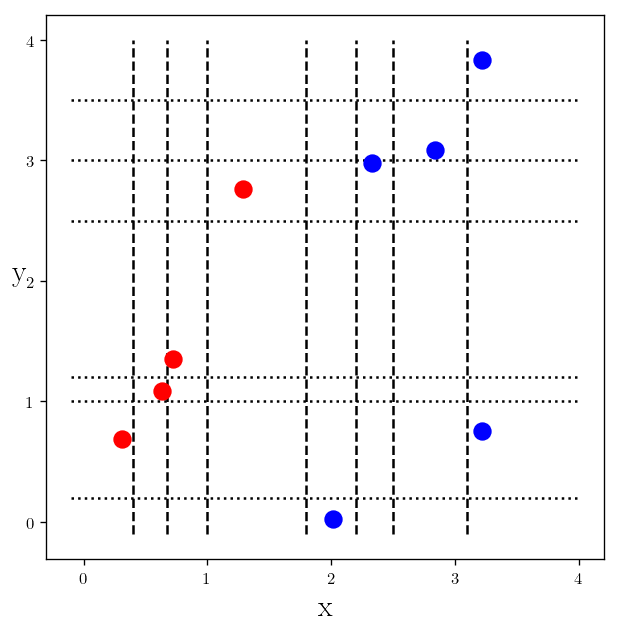

In [569]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
for split in splits:
    plt.vlines(split, -0.1, 4, linestyles="dashed")


for split in y_splits:
    plt.hlines(split, -0.1, 4, linestyles="dotted")


plt.ylabel(r"y", rotation=0)
plt.xlabel(r"x")

plt.show()

In [570]:
_dic_ = {"r" : y_c1, "b" : y_c2} 

groups_splited_y = devide_to_subgroups(split_data(y_c12, y_splits), _dic_)

In [571]:
root_node = [y_c1, y_c2]

G0 = Gini_impurity(root_node)
print("The Gini Impurity for the root node is =", G0, "\n", "===\n")

gains = []

for i, group in enumerate(groups_splited_y):
    
    size0, size1 = len(group[0]), len(group[1])
    gini0, gini1 = Gini_impurity(group[0]), Gini_impurity(group[1])
    
    Average_weighted_gini = (size0 * gini0 + size1 * gini1)/(size0 + size1)
    
    gini_gain = G0 - Average_weighted_gini
    
    gains.append(gini_gain)
    print("The Gini Impurity for split {} is =".format(i+1),round(Average_weighted_gini,3), "\n"
          "The Gini gain is = ", round(gini_gain,3), "\n", "-------\n")

The Gini Impurity for the root node is = 0.49382716049382713 
 ===

The Gini Impurity for split 1 is = 0.333 
The Gini gain is =  0.16 
 -------

The Gini Impurity for split 2 is = 0.472 
The Gini gain is =  0.022 
 -------

The Gini Impurity for split 3 is = 0.49 
The Gini gain is =  0.004 
 -------

The Gini Impurity for split 4 is = 0.428 
The Gini gain is =  0.066 
 -------

The Gini Impurity for split 5 is = 0.327 
The Gini gain is =  0.167 
 -------

The Gini Impurity for split 6 is = 0.333 
The Gini gain is =  0.16 
 -------



In [572]:
gain_split = [(i, j) for i,j in zip(gains, splits)]
gain_split.sort(reverse=True)
gain_split

[(0.1672965482489292, 2.2),
 (0.16049382716049382, 2.5),
 (0.16049382716049382, 0.4),
 (0.06632716049382714, 1.8),
 (0.021604938271604923, 0.67),
 (0.003827160493827142, 1)]

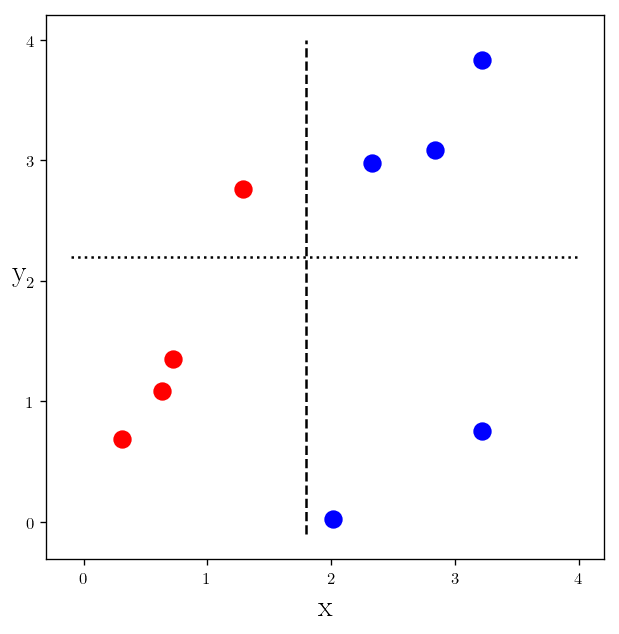

In [573]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.vlines(1.8, -0.1, 4, linestyles="dashed")

plt.hlines(2.2, -0.1, 4, linestyles="dotted")


plt.ylabel(r"y", rotation=0)
plt.xlabel(r"x")

plt.show()

These are the best classifier on seperate features.

This does the same thing using `sklearn`:

In [615]:
from sklearn.tree import DecisionTreeClassifier

In [616]:
labels = ["red" for x in x_c1]+["blue" for y in x_c2]

In [617]:
x_c12 = x_c12.reshape((len(x_c12), 1))

In [618]:
DTC = DecisionTreeClassifier(criterion="gini", max_depth=1,)

In [619]:
DTC.fit(x_c12, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [623]:
print(DTC.predict([[1.7]]), DTC.predict([[1.6]]))

['blue'] ['red']


What about using our classifiers seprately, which means just considering does which have $x<1.8$ and try to find the best $y$ criterion for the full dataset with green points.

In [648]:
x_c123 = np.array(np.append(x_c12, x_c3))
y_c123 = np.array(np.append(y_c12, y_c3))

idx = np.array(x_c123<1.8).ravel()
y_c123_x_selected = y_c123[idx]

In [656]:
_dic_ = {"r" : x_c1, "b" : x_c2, "g" : x_c3} 

groups_splited= devide_to_subgroups(split_data(x_c123, splits), _dic_)

In [673]:
root_node = [x_c1, x_c2, x_c3]

G0 = Gini_impurity(root_node)
print("The Gini Impurity for the root node is =", G0, "\n", "===\n")

gains = []

for i, group in enumerate(groups_splited):
    
    size0, size1 = len(group[0]), len(group[1])
    gini0, gini1 = Gini_impurity(group[0]), Gini_impurity(group[1])
    
    Average_weighted_gini = (size0 * gini0 + size1 * gini1)/(size0 + size1)
    
    gini_gain = G0 - Average_weighted_gini
    
    gains.append(gini_gain)
    print("The Gini Impurity for split {} is =".format(i+1),round(Average_weighted_gini,3), "\n"
          "The Gini gain is = ", round(gini_gain,3), "\n", "-------\n")

The Gini Impurity for the root node is = 0.6627218934911243 
 ===

The Gini Impurity for split 1 is = 0.587 
The Gini gain is =  0.076 
 -------

The Gini Impurity for split 2 is = 0.55 
The Gini gain is =  0.113 
 -------

The Gini Impurity for split 3 is = 0.491 
The Gini gain is =  0.172 
 -------

The Gini Impurity for split 4 is = 0.333 
The Gini gain is =  0.329 
 -------

The Gini Impurity for split 5 is = 0.444 
The Gini gain is =  0.218 
 -------

The Gini Impurity for split 6 is = 0.48 
The Gini gain is =  0.183 
 -------

The Gini Impurity for split 7 is = 0.496 
The Gini gain is =  0.167 
 -------



In [676]:
gain_split = [(i, j) for i,j in zip(gains, splits)]
gain_split.sort(reverse=True)

best_x_classifier = gain_split[0][1]

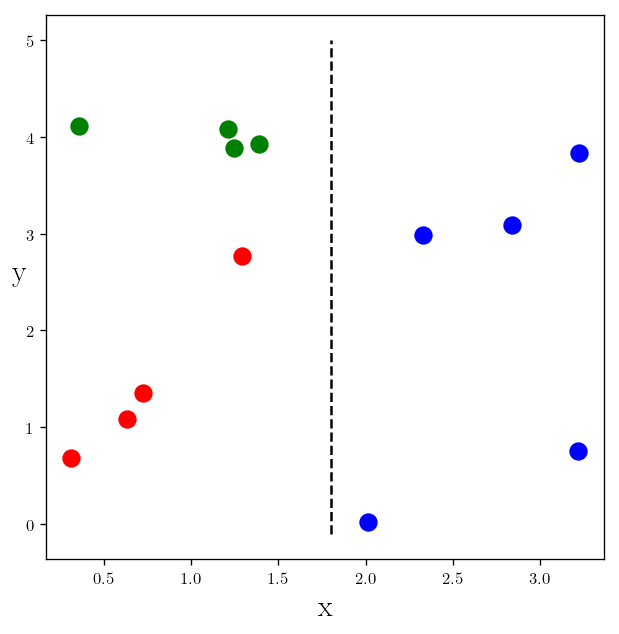

In [677]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)


plt.vlines(best_x_classifier, -0.1, 5, linestyles="dashed")


plt.ylabel(r"y", rotation=0)
plt.xlabel(r"x")

plt.show()

This is the first decision, now let's find the second criterion:

In [678]:
y_splits = [1, 1.1, 1.2, 2.5, 3, 4]

In [679]:
_dic_ = {"r" : y_c1, "b" : y_c2, "g" : y_c3} 

groups_splited_y = devide_to_subgroups(split_data(y_c123_x_selected, y_splits), _dic_)

In [680]:
root_node = [y_c1, y_c2, y_c3]

G0 = Gini_impurity(root_node)
print("The Gini Impurity for the root node is =", G0, "\n", "===\n")

gains = []

for i, group in enumerate(groups_splited_y):
    
    size0, size1 = len(group[0]), len(group[1])
    gini0, gini1 = Gini_impurity(group[0]), Gini_impurity(group[1])
    
    Average_weighted_gini = (size0 * gini0 + size1 * gini1)/(size0 + size1)
    
    gini_gain = G0 - Average_weighted_gini
    
    gains.append(gini_gain)
    print("The Gini Impurity for split {} is =".format(i+1),round(Average_weighted_gini,3), "\n"
          "The Gini gain is = ", round(gini_gain,3), "\n", "-------\n")

The Gini Impurity for the root node is = 0.6627218934911243 
 ===

The Gini Impurity for split 1 is = 0.327 
The Gini gain is =  0.336 
 -------

The Gini Impurity for split 2 is = 0.296 
The Gini gain is =  0.366 
 -------

The Gini Impurity for split 3 is = 0.296 
The Gini gain is =  0.366 
 -------

The Gini Impurity for split 4 is = 0.213 
The Gini gain is =  0.449 
 -------

The Gini Impurity for split 5 is = 0.0 
The Gini gain is =  0.663 
 -------

The Gini Impurity for split 6 is = 0.296 
The Gini gain is =  0.366 
 -------



In [681]:
gain_split = [(i, j) for i,j in zip(gains, y_splits)]
gain_split.sort(reverse=True)

best_y_classifier = gain_split[0][1]

Which gives us the classifier we come up with:

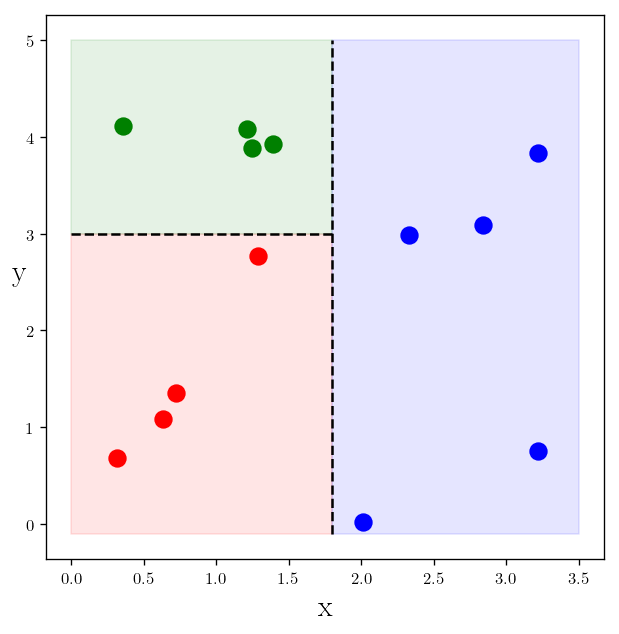

In [686]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)


plt.vlines(best_x_classifier, -0.1, 5, linestyles="dashed")
plt.hlines(best_y_classifier, 0, best_x_classifier, linestyles="dashed")


plt.fill_between([0, 1.8], [-0.1, -0.1], [best_y_classifier, best_y_classifier], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)
plt.fill_between([0, 1.8], [best_y_classifier, best_y_classifier], [5, 5], color="green", alpha=0.1)
    

plt.ylabel(r"y", rotation=0)
plt.xlabel(r"x")

plt.show()

Again using `sklearn`:

In [718]:
x_c123 = np.append(np.append(x_c1, x_c2), x_c3)
y_c123 = np.append(np.append(y_c1, y_c2), y_c3)

labels = ["red" for x in x_c1] + ["blue" for x in x_c2] + ["green" for x in x_c3]

X = np.c_[x_c123, y_c123]
print(X.shape)


(13, 2)


In [719]:
print(X[:4], labels[:4])

[[0.31269081 0.68464621]
 [0.72252159 1.35545584]
 [0.63080705 1.08213133]
 [1.288773   2.7641654 ]] ['red', 'red', 'red', 'red']


In [725]:
DTC_2 = DecisionTreeClassifier(criterion="gini", max_depth=2)

In [726]:
DTC_2.fit(X, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [757]:
x = np.linspace(0, 3.5, 30)
y = np.linspace(0, 5, 30)

x, y = np.meshgrid(x, y)

x = x.ravel()
y = y.ravel()

X_testing = np.c_[x, y]

colors = DTC_2.predict(X_testing)


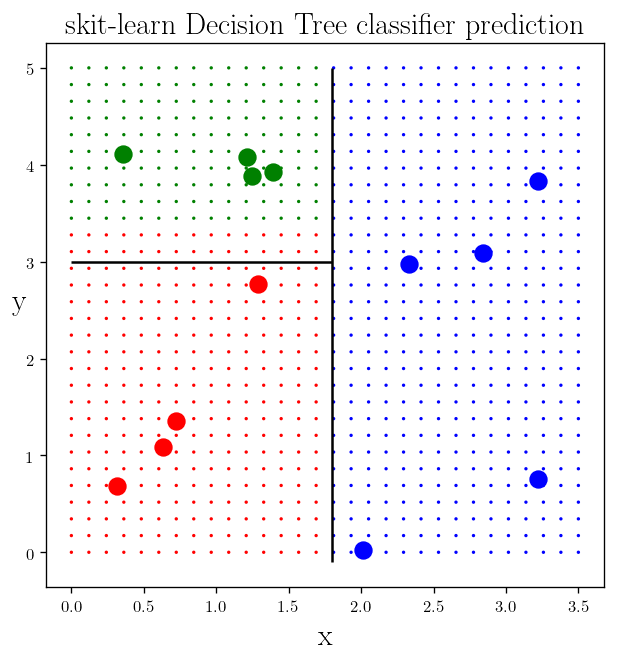

In [761]:
plt.scatter(x, y, c=colors, s = 1)



plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)



plt.vlines(best_x_classifier, -0.1, 5)
plt.hlines(best_y_classifier, 0, best_x_classifier)


plt.title(r"skit-learn Decision Tree classifier prediction", fontsize =18)

plt.ylabel(r"y", rotation=0)
plt.xlabel(r"x")

plt.show()

These is the predicion of the `skit-learn` decision tree classifier and we it is slightly different from ours but as you can notice it depends on the somewhat arbitrary definition of the criteria. (within a range)

Here we are going to use another famous dataset called _banknote authentication Data Set_ which is in the text file and contains the following information: 

## Banknote Auhentication:
### Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

Let's read the data set:

In [79]:
address_data = "data_banknote_authentication.txt"

with open(address_data, "r") as f:
    lines = f.readlines()
print(lines[:2])

['3.6216,8.6661,-2.8073,-0.44699,0\n', '4.5459,8.1674,-2.4586,-1.4621,0\n']


Let's as an excersise use the numpy.loadtxt instead:

In [80]:
Full_data = np.loadtxt(address_data, delimiter=",", usecols=(0, 1, 2, 3, 4))

In [81]:
Full_data

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

Or using [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) library which is very useful:

Can be installed by the following from your shell:

```shell
pip3 install pandas
```

or just use the shell access from notebook by:

```python
!pip3 install pandas
```

In [82]:
import pandas as pd

In [91]:
columns_name = ["variance", "skewness", "curtosis", "entropy", "class"]

ddd={}

pd_full_data = pd.read_csv(address_data, header=None, names=columns_name,)

In [99]:
pd_full_data["class"][:4]

0    0
1    0
2    0
3    0
Name: class, dtype: int64

So for dividing the dataset we need to define a cost function, here our cost function is **Gini impurity** (score). The Gini index gives a score for how good is our sepratation of data, the perfect score is 0 and worst case is 0.5 for two classes. Let's start with an example:


In [102]:
classes = np.array(pd_full_data["class"])

In [105]:
class Decision_Tree_Regression:
    
    def __init__(self):
        pass
    
    def fit(self)

In [106]:
proportion_nonzero

0.0007288629737609329

In [104]:
np.nonzero(classes)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
class RandomForest():
    def __init__(self, x, y, n_trees, n_features, sample_sz, depth=10, min_leaf=5):
        np.random.seed(12)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features
        print(self.n_features, "sha: ",x.shape[1])    
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf  = x, y, sample_sz, depth, min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        return DecisionTree(self.x.iloc[idxs], self.y[idxs], self.n_features, f_idxs,
                    idxs=np.array(range(self.sample_sz)),depth = self.depth, min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

class DecisionTree():
    def __init__(self, x, y, n_features, f_idxs,idxs,depth=10, min_leaf=5):
        self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
        self.depth = depth
        print(f_idxs)
#         print(self.depth)
        self.n_features = n_features
        self.n, self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in self.f_idxs: self.find_better_split(i)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth-1, min_leaf=self.min_leaf)
        self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth-1, min_leaf=self.min_leaf)

    def find_better_split(self, var_idx):
        x, y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf') or self.depth <= 0 
    

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)